In [1]:
# Import necessary libraries
# The libraries are listed by their appearence in the code
import pandas as pd
import geopandas as gpd
# !pip install unidecode
from unidecode import unidecode
import folium
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt
import numpy as np

# from sklearn.cluster import KMeans
import statsmodels.api as sm
import seaborn as sns

# !pip instal fcapy
from fcapy.lattice import ConceptLattice
from fcapy.context import FormalContext
from fcapy.visualizer import LineVizNx


About the data :
- The dataset covers a wide range of socio-economic, environmental (Nature),
and health-related indicators of 100 cities in France from the year 2005.
- The variables/features are partitioned like this :
- Economics : Chomage, ChomageJeunes, ChomageLong, EvoluEmploiCree, Activite, EmploiFeminin, EmploiCommune, DefaillEntreprise, SalaireAnnuel, ImpotRevenu, ImpotFortune,Imposables, MetreCarreAncien, TaxeHabitation, FoncierBati, MetreCubeEau, EvolDemographique, Vieillissement, AttiranceGlobale, AttiranceActifs, Proprietaires, LogtSup4pieces,
LogtInsalubre, LogtVacant, LogtConstruction
- Risk Factors : Criminalite, EvolutionCrimes, SecuriteRoutiere, Inondations,TerrainsPollues, UsinesRisques, MortaliteInfantile, MortaliteCancerPoumon, MortaliteAlcool,DecesInfarctus, TauxSuicide, MortaliteGlobale, TailleClassesPrimaires,Retard6eme, Retard3eme, RetardTerminale
- Nature : Mer, Ski, Soleil, Pluie, Temperature, MarcheAPied
- Culture : Musees, Cinema, MonumHistoriques, PretLivres, RestaurDistingues, Presse, Etudiants

Meta data :
A tsv file (tab separated values) that contains 55 variables (columns)
and 100 observations(rows).

1. Ville: The city or municipality.
2. Chomage: Overall unemployment rate.
3. ChomageJeunes: Youth unemployment rate (typically for ages 15-24).
4. ChomageLong: Long-term unemployment rate (usually for those unemployed for over a year).
5. EvoluEmploiCree: Employment growth or jobs created.
6. Activite: Labor force participation rate.
7. EmploiFeminin: Female employment rate.
8. EmploiCommune: Employment rate within the commune.
9. DefaillEntreprise: Business failure rate or number of business bankruptcies.
10. SalaireAnnuel: Average annual salary.
11. Criminalite: Crime rate.
12. EvolutionCrimes: Change in crime rate over a specified period.
13. SecuriteRoutiere: Road safety statistics (e.g., accidents, fatalities).
14. Inondations: Frequency or risk of flooding.
15. TerrainsPollues: Number or area of polluted lands.
16. UsinesRisques: Number of high-risk factories (e.g., chemical plants).
17. MortaliteInfantile: Infant mortality rate.
18. MortaliteCancerPoumon: Mortality rate from lung cancer.
19. MortaliteAlcool: Mortality rate related to alcohol consumption.
20. DecesInfarctus: Mortality rate from heart attacks (infarctions).
21. TauxSuicide: Suicide rate.
22. MortaliteGlobale: Overall mortality rate.
23. TailleClassesPrimaires: Average class size in primary schools.
24. Retard6eme: Proportion of students held back in 6th grade.
25. Retard3eme: Proportion of students held back in 9th grade.
26. RetardTerminale: Proportion of students held back in the final year of high school.
27. MetreCarreAncien: Average price per square meter of older properties.
28. TaxeHabitation: Residential tax rate.
29. FoncierBati: Property tax rate on built property.
30. MetreCubeEau: Cost per cubic meter of water.
31. Proprietaires: Homeownership rate.
32. LogtSup4pieces: Proportion of homes with more than four rooms.
33. LogtInsalubre: Proportion of substandard housing.
34. LogtVacant: Proportion of vacant housing units.
35. LogtConstruction: Number or rate of new housing constructions.
36. Mer: Qualitative data that describes numbers of beaches.
37. Ski: Has a ski resort or No.
38. Soleil: Average annual sunshine (hours).
39. Pluie: Average annual rainfall (mm).
40. Temperature: Average annual temperature.
41. MarcheAPied: Walkability score or pedestrian-friendliness.
42. Musees: Number of museums.
43. Cinema: Number of cinemas.
44. MonumHistoriques: Number of historical monuments.
45. PretLivres: Number of books loaned (e.g., by libraries).
46. RestaurDistingues: Number of distinguished restaurants (e.g., Michelin-starred).
47. Presse: index of number of press outlets or newspapers.
48. Etudiants: Index of number of students.
49. ImpotRevenu: Income tax rate.
50. ImpotFortune: Wealth tax rate.
51. Imposables: Proportion of taxable households.
52. EvolDemographique: Demographic growth rate.
53. Vieillissement: Aging index (ratio of elderly to young population).
54. AttiranceGlobale: Overall attractiveness score (a composite index).
55. AttiranceActifs: Attractiveness for working-age population.

## Visualizing the Data on a map

In [7]:
# Read the tsv file and set ville (cities) as index :
df = pd.read_csv("../Datasets/French_cities_2005.csv", sep="\t", index_col="Ville")
df.index = df.index.str.lower()
df.head(5)

Chomage  ChomageJeunes  ChomageLong  EvoluEmploiCree  Activite  \
Ville                                                                           
agen             0.181          0.161         0.58             0.05      0.44   
aixenprovence    0.166          0.133         0.55             0.10      0.43   
ajaccio          0.166          0.181         0.52             0.02      0.43   
albi             0.144          0.151         0.54             0.05      0.42   
amiens           0.200          0.165         0.61             0.05      0.44   

               EmploiFeminin  EmploiCommune  DefaillEntreprise  SalaireAnnuel  \
Ville                                                                           
agen                    0.53           0.56               0.18          17210   
aixenprovence           0.47           0.57               0.13          22232   
ajaccio                 0.46           0.77               0.14          17882   
albi                    0.51           0.67               0.09          17923   
amiens                  0.46           0.64               0.17          18037   

               Criminalite  ...  RestaurDistingues  Presse  Etudiants  \
Ville                       ...                                         
agen                 105.7  ...                0.0    28.6       0.06   
aixenprovence        123.5  ...                1.0    19.9       0.31   
ajaccio               55.8  ...                1.0    24.4       0.01   
albi                  68.7  ...                0.0    22.1       0.07   
amiens               116.9  ...                0.0    14.7       0.18   

               ImpotRevenu  ImpotFortune  Imposables  EvolDemographique  \
Ville                                                                     
agen                  1067         0.005          46             -0.013   
aixenprovence         2121         0.015          57              0.084   
ajaccio               1207         0.004          47             -0.103   
albi                  1245         0.004          51             -0.007   
amiens                1208         0.006          47              0.028   

               Vieillissement  AttiranceGlobale  AttiranceActifs  
Ville                                                             
agen                     0.56              0.38             0.47  
aixenprovence            0.37              0.37             0.39  
ajaccio                  0.37              0.19             0.21  
albi                     0.59              0.31             0.35  
amiens                   0.24              0.26             0.28  

[5 rows x 54 columns]

Let's learn a lil bit about the french cities here


In [4]:
print(f"The french cities available in this dataset are : \n {(df.index)}")

The french cities available in this dataset are : 
 Index(['agen', 'aixenprovence', 'ajaccio', 'albi', 'amiens', 'angers',
       'angouleme', 'annecy', 'antibes', 'arles', 'auxerre', 'avignon',
       'bastia', 'bayonne', 'beauvais', 'belfort', 'besancon', 'beziers',
       'blois', 'bordeaux', 'boulognebillancourt', 'bourgenbresse', 'bourges',
       'brest', 'brivelagaillarde', 'caen', 'calais', 'cannes', 'carcassonne',
       'castres', 'chalonsursaone', 'chambery', 'charlevillemezieres',
       'chartres', 'cholet', 'clermontferrand', 'colmar', 'compiegne',
       'corbeilessonnes', 'creteil', 'dijon', 'dunkerque', 'epinal', 'evry',
       'gap', 'grenoble', 'la rochelle', 'la rochesuryon', 'laval', 'lehavre',
       'lemans', 'lille', 'limoges', 'lyon', 'marseille', 'melun', 'metz',
       'montauban', 'montlucon', 'montpellier', 'mulhouse', 'nancy', 'nantes',
       'neuillysurseine', 'nevers', 'nice', 'nimes', 'niort', 'orleans',
       'paris', 'pau', 'perigueux', 'perpignan',

In [8]:
# Read the data we scrapped using Geopandas
cities = gpd.read_file("../Code/regions.geojson")
cities.head(5)

code           nom                                           geometry
0  16001     Angoulême  POLYGON ((0.04139 45.88152, 0.05060 45.88018, ...
1  23002        Guéret  POLYGON ((2.16778 46.42407, 2.18516 46.42328, ...
2  24003     Périgueux  POLYGON ((0.33463 45.46021, 0.35145 45.45629, ...
3  87002       Limoges  POLYGON ((1.05788 45.95449, 1.07307 45.95862, ...
4  87003  Rochechouart  POLYGON ((0.93468 45.99221, 0.94392 45.98661, ...

format the new data set to make it match the data set we have so we can merge the
two datasets :
- We'll unidecode it : remove the accents in the french language like é, è and ô...
- Remove dashes between
- Lower case the values of the column in common

In [10]:
def remove_accents_and_dashes(word):
    # Remove accents using unidecode
    word_normalized = unidecode(word)
    # Remove dashes
    word_normalized = word_normalized.replace("-", "")
    word_normalized = word_normalized.lower()
    return word_normalized


cities["nom"] = [remove_accents_and_dashes(word) for word in cities["nom"]]
cities.head(5)

code           nom                                           geometry
0  16001     angouleme  POLYGON ((0.04139 45.88152, 0.05060 45.88018, ...
1  23002        gueret  POLYGON ((2.16778 46.42407, 2.18516 46.42328, ...
2  24003     perigueux  POLYGON ((0.33463 45.46021, 0.35145 45.45629, ...
3  87002       limoges  POLYGON ((1.05788 45.95449, 1.07307 45.95862, ...
4  87003  rochechouart  POLYGON ((0.93468 45.99221, 0.94392 45.98661, ...

Now we will merge the two Datasets:

In [13]:
all_cities = pd.merge(cities, df, left_on="nom", right_index=True, how="inner")
all_cities = all_cities.reset_index()
all_cities.head(4)

index   code        nom                                           geometry  \
0      0  16001  angouleme  POLYGON ((0.04139 45.88152, 0.05060 45.88018, ...   
1      2  24003  perigueux  POLYGON ((0.33463 45.46021, 0.35145 45.45629, ...   
2      3  87002    limoges  POLYGON ((1.05788 45.95449, 1.07307 45.95862, ...   
3     12  64003        pau  POLYGON ((-0.61490 43.54472, -0.61541 43.53859...   

   Chomage  ChomageJeunes  ChomageLong  EvoluEmploiCree  Activite  \
0    0.203          0.118         0.61             0.05      0.46   
1    0.156          0.136         0.55             0.04      0.46   
2    0.135          0.115         0.55             0.04      0.45   
3    0.170          0.117         0.56             0.01      0.42   

   EmploiFeminin  ...  RestaurDistingues  Presse  Etudiants  ImpotRevenu  \
0           0.49  ...                0.0    28.8       0.04         1116   
1           0.52  ...                0.0    28.8       0.06         1172   
2           0.48  ...                1.0    21.0       0.13         1331   
3           0.51  ...                0.0    23.0       0.17         1372   

   ImpotFortune  Imposables  EvolDemographique  Vieillissement  \
0         0.006          48              0.007            0.44   
1         0.005          50             -0.003            0.68   
2         0.006          54              0.004            0.50   
3         0.009          51             -0.042            0.51   

   AttiranceGlobale  AttiranceActifs  
0              0.38             0.46  
1              0.39             0.46  
2              0.29             0.30  
3              0.37             0.40  

[4 rows x 58 columns]

In [14]:
all_cities.shape

(88, 58)

- Okay so we got 88% information from the Data we scrapped, which is not bad
- A better practice would be making sure we got the longitude and latitude
of all of 100 cities
- We'll get the centroid of each city so we can add a marker on the map.

In [17]:
mean_latitudes = []
mean_longitudes = []

# Loop through each geometry entry in the 'geometry' column
for geom in all_cities["geometry"]:
    if geom.is_valid:
        # Calculate the centroid of the geometry
        centroid = geom.centroid
        mean_lon, mean_lat = centroid.x, centroid.y
    else:
        mean_lon, mean_lat = None, None

    mean_longitudes.append(mean_lon)
    mean_latitudes.append(mean_lat)

# Add these lists as new columns in your GeoDataFrame
all_cities["mean_latitude"] = mean_latitudes
all_cities["mean_longitude"] = mean_longitudes
all_cities.head(5)

index   code        nom                                           geometry  \
0      0  16001  angouleme  POLYGON ((0.04139 45.88152, 0.05060 45.88018, ...   
1      2  24003  perigueux  POLYGON ((0.33463 45.46021, 0.35145 45.45629, ...   
2      3  87002    limoges  POLYGON ((1.05788 45.95449, 1.07307 45.95862, ...   
3     12  64003        pau  POLYGON ((-0.61490 43.54472, -0.61541 43.53859...   
4     20  79002      niort  POLYGON ((-0.61397 46.62012, -0.59383 46.61983...   

   Chomage  ChomageJeunes  ChomageLong  EvoluEmploiCree  Activite  \
0    0.203          0.118         0.61             0.05      0.46   
1    0.156          0.136         0.55             0.04      0.46   
2    0.135          0.115         0.55             0.04      0.45   
3    0.170          0.117         0.56             0.01      0.42   
4    0.148          0.165         0.59             0.06      0.47   

   EmploiFeminin  ...  Etudiants  ImpotRevenu  ImpotFortune  Imposables  \
0           0.49  ...       0.04         1116         0.006          48   
1           0.52  ...       0.06         1172         0.005          50   
2           0.48  ...       0.13         1331         0.006          54   
3           0.51  ...       0.17         1372         0.009          51   
4           0.51  ...       0.04         1408         0.006          54   

   EvolDemographique  Vieillissement  AttiranceGlobale  AttiranceActifs  \
0              0.007            0.44              0.38             0.46   
1             -0.003            0.68              0.39             0.46   
2              0.004            0.50              0.29             0.30   
3             -0.042            0.51              0.37             0.40   
4             -0.006            0.45              0.31             0.36   

   mean_latitude  mean_longitude  
0      45.571031        0.203806  
1      45.193229        0.607037  
2      45.754764        1.382721  
3      43.388521       -0.400499  
4      46.278155       -0.280306  

[5 rows x 60 columns]

Now we will create a map and highlight the country of France and mark the cities

In [20]:
map = folium.Map([46.716671, 3], zoom_start=6)

cities_map = folium.GeoJson(
    cities,
    style_function=lambda feature: {
        "fillColor": "blue",
        "color": "white",
        "weight": 0.5,
    },
    name="Map of cities in France",
    zoom_on_click=True,
).add_to(map)

for i in range(len(all_cities)):
    folium.Marker(
        location=[
            all_cities["mean_latitude"][i],
            all_cities["mean_longitude"][i],
        ],  # Convert to (latitude, longitude)
        popup=all_cities["nom"][i].capitalize(),
        tooltip=all_cities["nom"][i].capitalize(),
    ).add_to(map)
map

## Hierarchical Agglomerative Clustering

- Now we will be interested in making a HAC (hierarchical agglomerative clustering)
of this Dataset to find cities that are similar based on the indicators we have...
- We will start that by doing a quick feature engineering where we will standardize
the data : by doing that Standardization allows for the rebalancing of scales and the
elimination of the effect of units of each variable. This enables us to compare
variables and individuals effectively, regardless of their original scales,
It also helps us avoid mutual compensation when calculating Euclidean distances
to measure similarity/dissimilarity for hierarchical clustering

In [21]:
# We will set the citites as index of our dataframe
df_std = pd.DataFrame(preprocessing.scale(df), columns=df.columns, index=df.index)
df_std.head(4)

Chomage  ChomageJeunes  ChomageLong  EvoluEmploiCree  \
Ville                                                                  
agen          -0.085165       0.343521     0.781258         0.210801   
aixenprovence -0.098694      -0.488536     0.111608         1.422300   
ajaccio       -0.098694       0.937847    -0.558041        -0.516099   
albi          -0.118538       0.046357    -0.111608         0.210801   

               Activite  EmploiFeminin  EmploiCommune  DefaillEntreprise  \
Ville                                                                      
agen          -0.186893       1.424926       0.026532           0.583576   
aixenprovence -0.532990      -0.390266       0.106931          -0.647597   
ajaccio       -0.532990      -0.692798       1.714921          -0.401362   
albi          -0.879087       0.819862       0.910926          -1.632535   

               SalaireAnnuel  Criminalite  ...  RestaurDistingues    Presse  \
Ville                                      ...                                
agen               -0.467561     0.556890  ...          -0.223449  2.054179   
aixenprovence       0.715673     1.314852  ...          -0.086364 -0.014744   
ajaccio            -0.309231    -1.567961  ...          -0.086364  1.055388   
albi               -0.299571    -1.018651  ...          -0.223449  0.508432   

               Etudiants  ImpotRevenu  ImpotFortune  Imposables  \
Ville                                                             
agen           -0.424320    -0.342473     -0.285327   -0.876971   
aixenprovence   2.580777     0.372326      0.269783    0.620961   
ajaccio        -1.025339    -0.247528     -0.340837   -0.740795   
albi           -0.304116    -0.221757     -0.340837   -0.196093   

               EvolDemographique  Vieillissement  AttiranceGlobale  \
Ville                                                                
agen                   -0.585842        1.141573          0.809866   
aixenprovence           1.611632       -0.125360          0.665761   
ajaccio                -2.624735       -0.125360         -1.928114   
albi                   -0.449916        1.341615         -0.198864   

               AttiranceActifs  
Ville                           
agen                  1.383227  
aixenprovence         0.301525  
ajaccio              -2.132306  
albi                 -0.239327  

[4 rows x 54 columns]

- The principle of hierarchical clustering is to easily group or aggregate according
to a predefined similarity criterion, which is expressed in the form of a distance
matrix. This matrix shows the distance between each pair of individuals.
Two identical observations/individuals will have a distance of zero.

If we consider two points $p$  and $q'$ in  $\mathbf{R}^{n}$ with respective
coordinates $(x_1,...,x_n)$ and $(y_1,...,y_n)$ their Euclidean distance
is given by the formula:
$$
\left\lVert p - q' \right\rVert = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$
- We perform hierarchical clustering of French cities using Ward's index
as a measure of aggregating clusters. 
- We will be using different Cluster linkage
and compare them

In [22]:
# Create a function to run HAC
def linked_method(dataframe, method):
    return linkage(
        dataframe,
        method=method,
        optimal_ordering=True,
    )

# A dendrogram is a diagram representing a tree.
# in hierarchical clustering, it illustrates the arrangement of the clusters produced by the corresponding analyses.
def plot_dendrogram(data, method, threshold=1000):
    plt.figure(figsize=(14, 8))
    dendrogram(
        data,
        orientation="top",
        labels=df_std.index.values,
        get_leaves=True,
        distance_sort="ascending",
        color_threshold=threshold,
    )
    plt.axhline(
        y=threshold, color="black", linestyle="--", label="Horizontal Line at y=5"
    )
    plt.title(f"Dendrogramm of the linkeage criterion: {method} ")
    plt.xlabel("Cities")
    plt.ylabel("Euclidean distance")
    return plt.show()

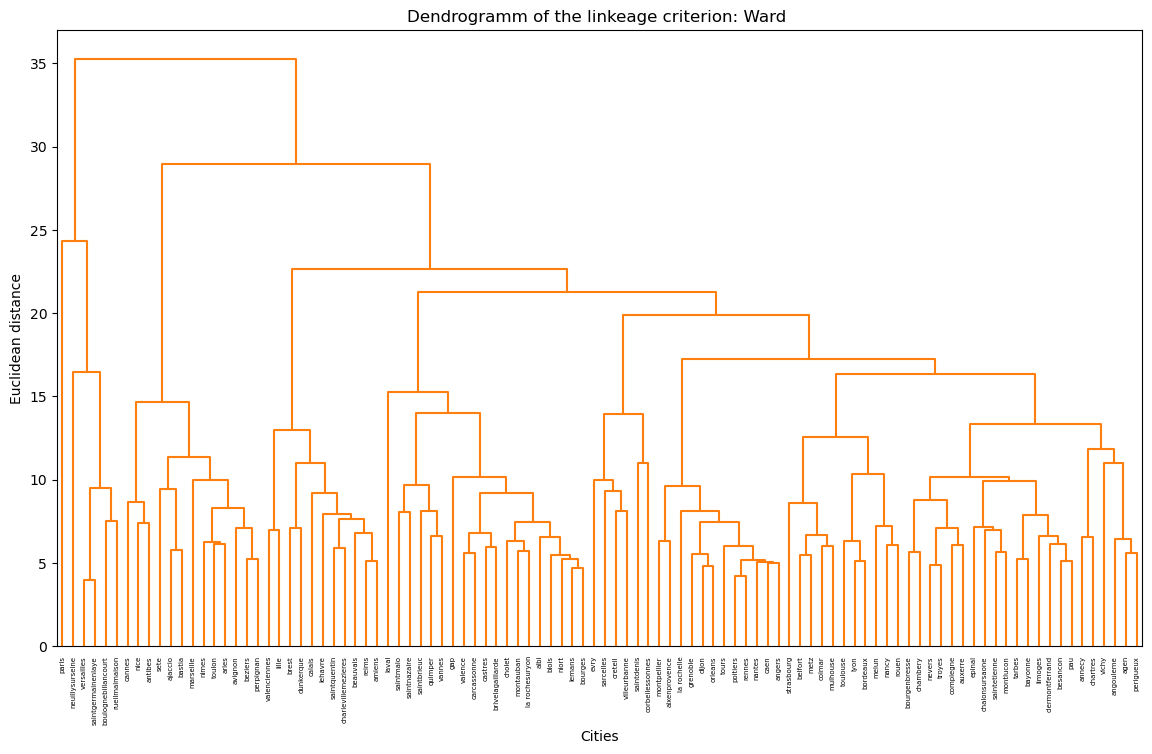

In [23]:
# Ward linkage (Minimum Increase of Sum of Squares)
ward_linkeage = linked_method(df_std, "ward")
plot_dendrogram(ward_linkeage, "Ward")

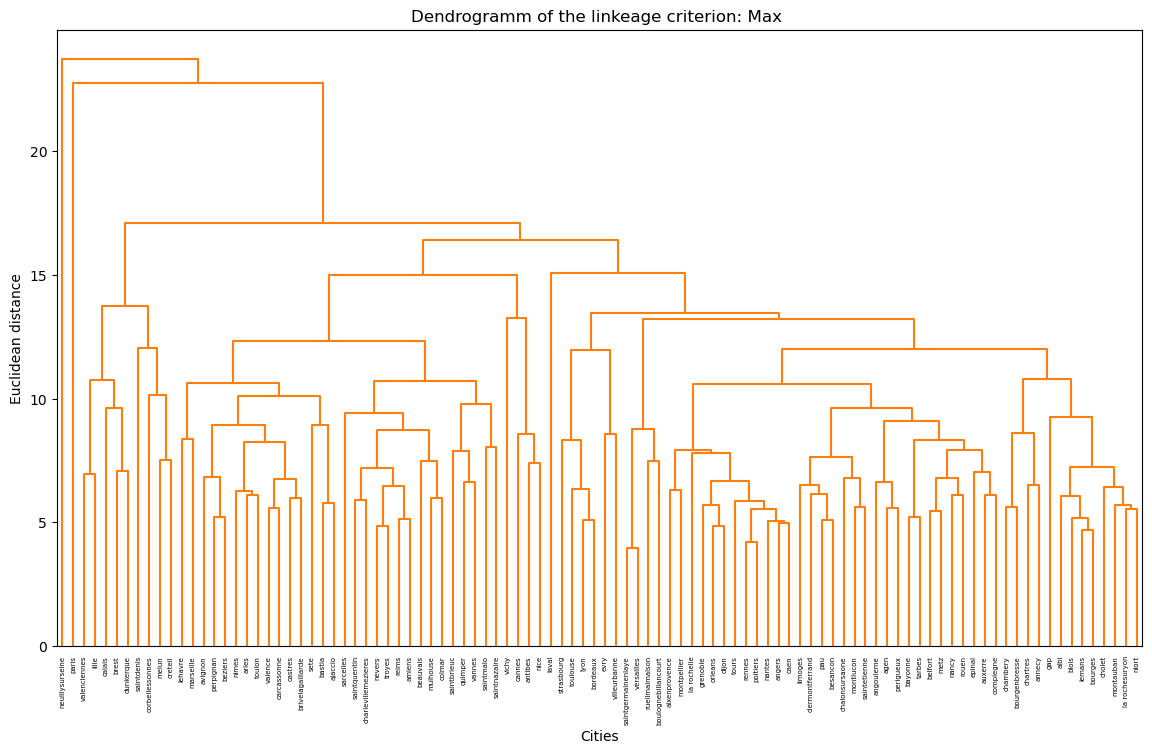

In [24]:
# Maximum or complete-linkage clustering
max_linkage = linked_method(df_std, "complete")
plot_dendrogram(max_linkage, "Max")

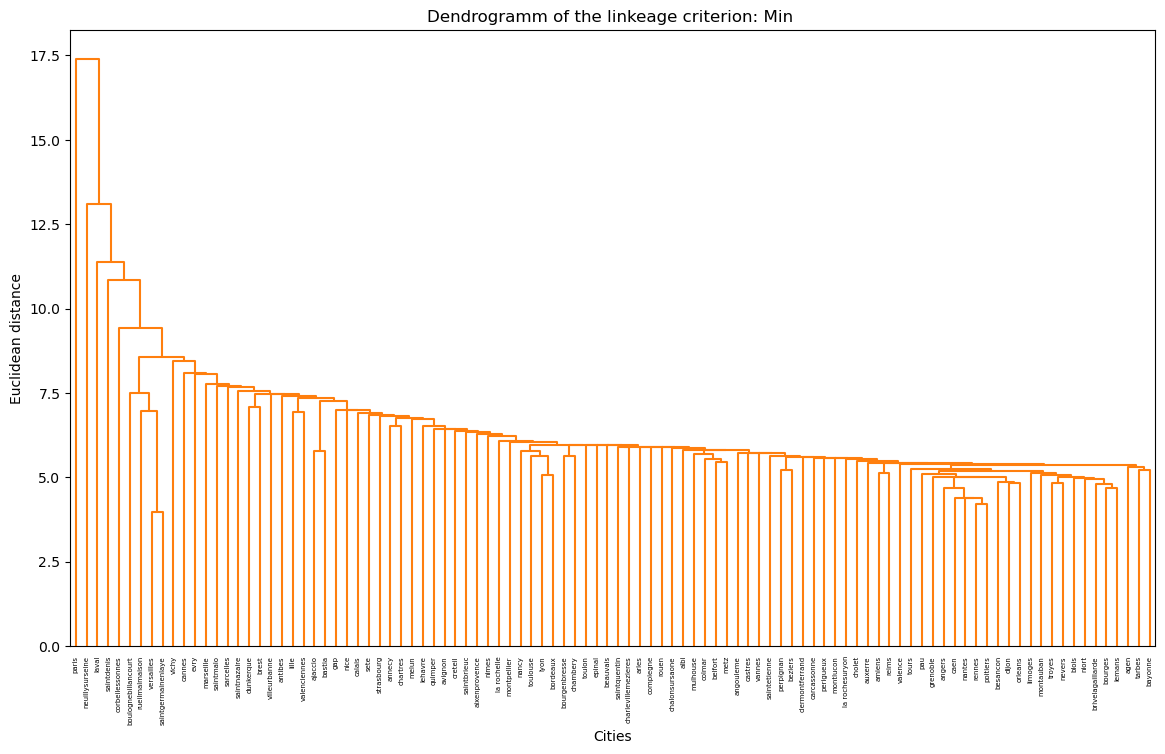

In [25]:
min_linkage = linked_method(df_std, "single")
plot_dendrogram(min_linkage, "Min")

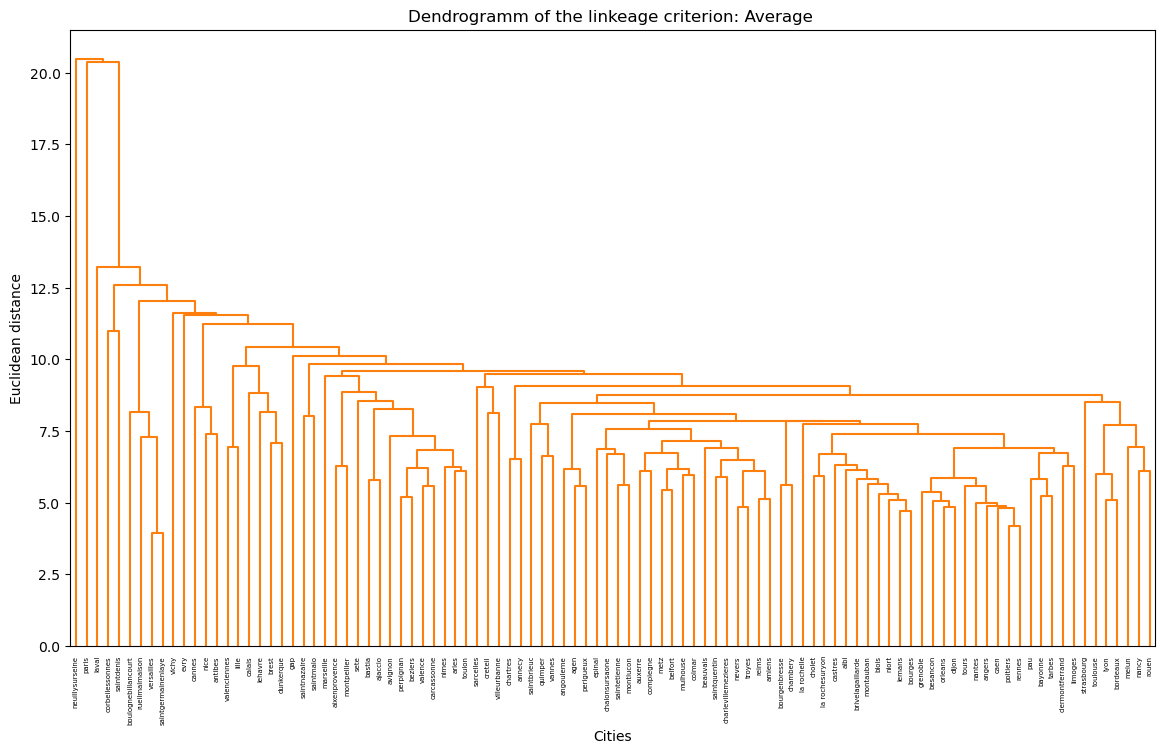

In [26]:
# Average Linkeage
average_linkeage = linked_method(df_std, "average")
plot_dendrogram(average_linkeage, "Average")

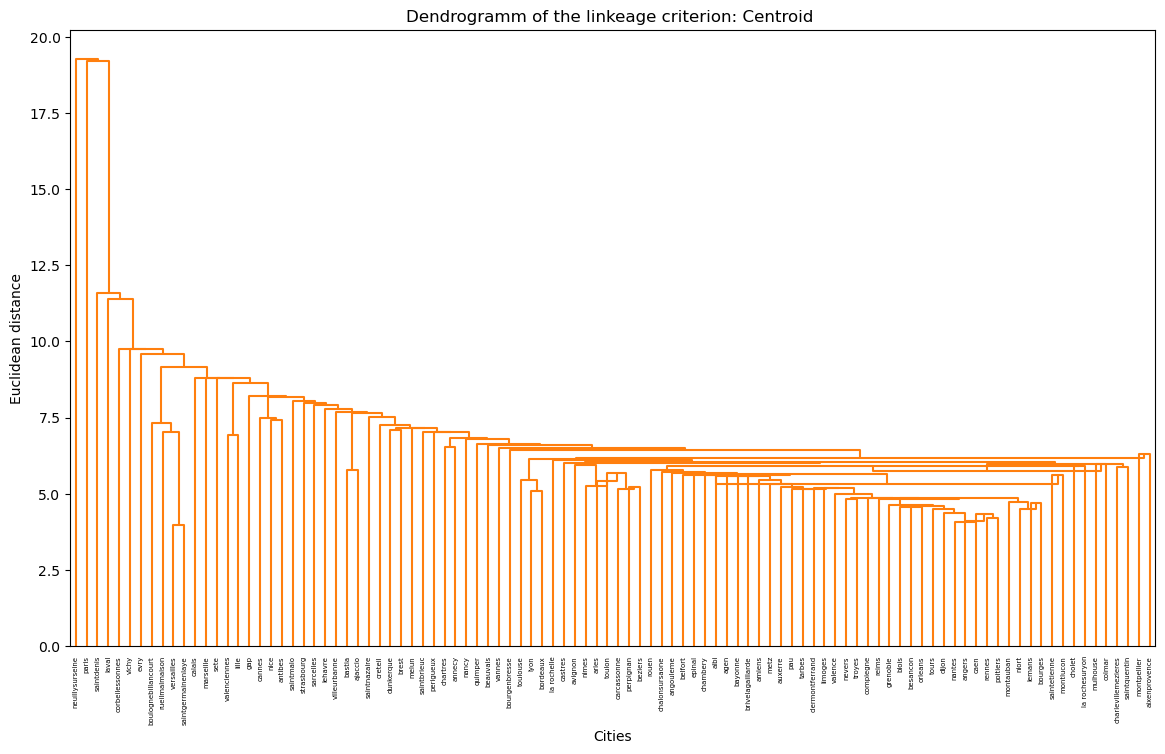

In [27]:
# Centroid Linkage
centroid_linkage = linked_method(df_std, "centroid")
plot_dendrogram(centroid_linkage, "Centroid")

- From this dendrogram obtained from the hierarchy indicated by the Ward index,
we notice the potential to have fairly homogeneous classes. We observe different
drops at the level of the aggregation cost, and the classes seem compact.
- The maximum linkeage criterion gave similar results to Ward's
- We notice that the minimum linkeage criterion does not have sufficiently homogeneous
classes, but the classes seem continuous due to the relatively small gap between
them. This does not serve to partition the individuals in a homogeneous manner
but rather in a continuous way. This index can be used to detect continuity or
contiguity in the data, but that is not the case in this work.
- So we will continue our work with the Ward criterion...

- To determine the addequate number of classes to make clusters using Ward index,
we can use a barplot of to observe how the values of ward's series and how
it is decreasing, a good indicator where we should cut our dendrogram is when we could
notice a peak in this bar plot

In [28]:
def diff_series(linkage_matrix):
    data = pd.DataFrame(
        linkage_matrix,
        columns=[
            "n° partition",
            "n° partiton_2",
            "Aggregation_cost",
            "n°obs orginal dans partition",
        ],
    )
    data = data.sort_values(by=data.columns[2], ascending=False)
    diff = abs(data["Aggregation_cost"].diff())
    data = data.join(diff, rsuffix="_Diff")
    return data


ward_diff_series = diff_series(ward_linkeage)
ward_diff_series


n° partition  n° partiton_2  Aggregation_cost  \
98         196.0          197.0         35.246034   
97         188.0          195.0         28.930049   
96          69.0          191.0         24.316331   
95         184.0          194.0         22.655481   
94         193.0          189.0         21.261233   
..           ...            ...               ...   
4           64.0           93.0          4.839586   
3           40.0           68.0          4.831673   
2           50.0           22.0          4.692798   
1           73.0           76.0          4.192541   
0           97.0           82.0          3.957543   

    n°obs orginal dans partition  Aggregation_cost_Diff  
98                         100.0                    NaN  
97                          94.0               6.315985  
96                           6.0               4.613717  
95                          81.0               1.660850  
94                          70.0               1.394248  
..                           ...                    ...  
4                            2.0               0.129376  
3                            2.0               0.007913  
2                            2.0               0.138876  
1                            2.0               0.500257  
0                            2.0               0.234998  

[99 rows x 5 columns]

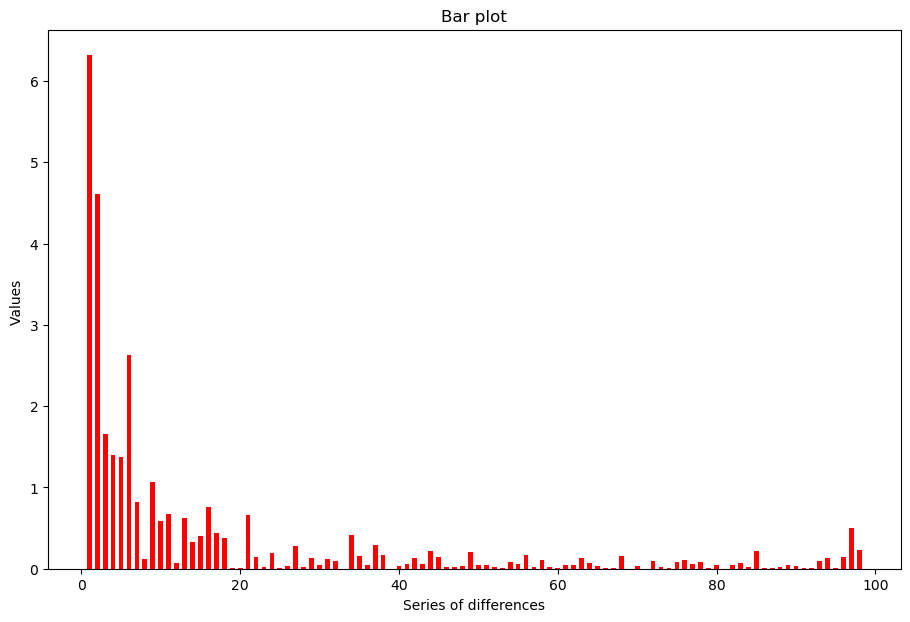

In [29]:
def plot_diff_series(diff_series):
    plt.figure(figsize=(11, 7))
    plt.bar(
        np.arange(0, diff_series["Aggregation_cost_Diff"].size),
        diff_series["Aggregation_cost_Diff"],
        width=0.6,
        color="red",
    )
    # Ajouter des titres et des étiquettes
    plt.title("Bar plot")
    plt.xlabel("Series of differences")
    plt.ylabel("Values ")
    # Afficher le diagramme
    return plt.show()


plot_diff_series(ward_diff_series)

- The largest drops encourage us to choos k=3 or k=7. However, for simplicity
in interpretation, we will choose k = 3, with a cut-off value of 25;
the aggregation cost we have chosen to partition our individuals into 3 classes like
it is showed below :

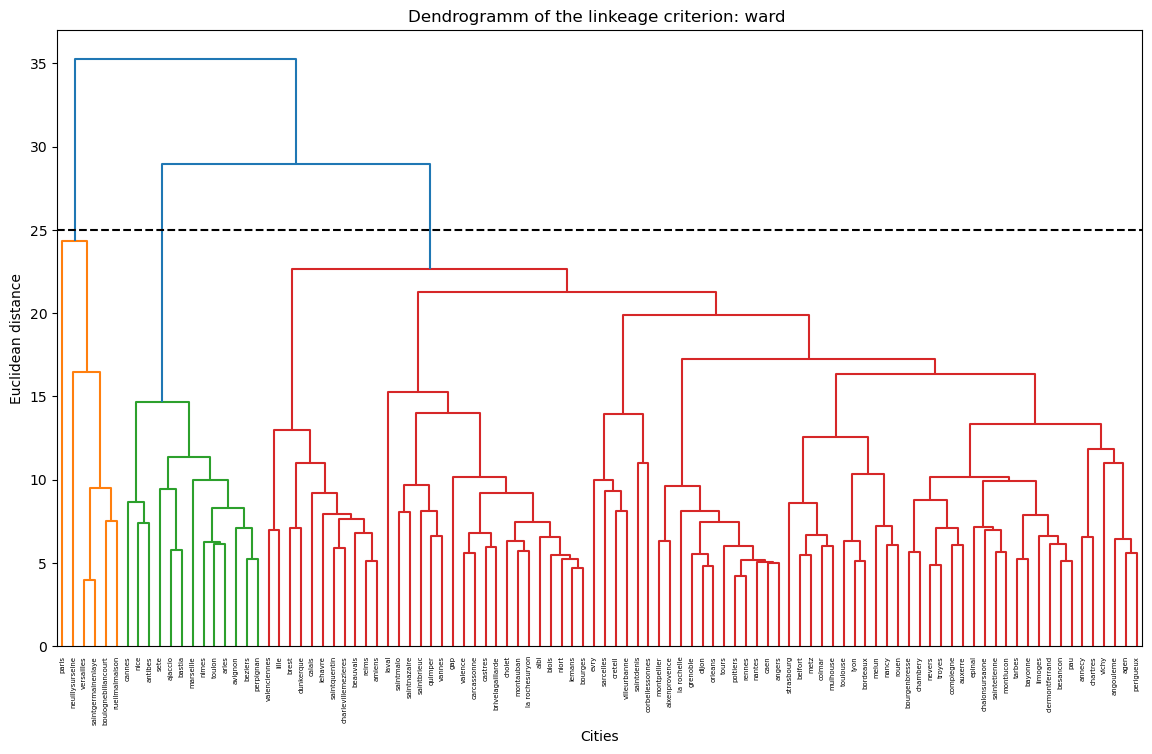

In [30]:
plot_dendrogram(ward_linkeage, "ward", threshold=25)

- So we get three classes/Clusters :
Sure, here's the text without the LaTeX format:

- First class:
Boulogne-Billancourt, Neuilly-sur-Seine, Paris, Rueil-Malmaison, Saint-Germain-en-Laye, Versailles.
  - 8 cities form a class in the region of "western Paris".

- Second class:
Ajaccio, Antibes, Arles, Avignon, Bastia, Béziers, Cannes, Marseille, Nice, Nîmes,
Perpignan, Sète, Toulon.
  - With 13 cities, the second class represents "the cities of southern France".

- Third class: Agen, Aix-en-Provence, Albi, ... Saint-Nazaire,Saint-Quentin,
Sarcelles, Strasbourg, Tarbes, Toulouse, Tours, Troyes, Valence, Valenciennes, Vannes, Vichy, Villeurbanne.
  - With 81 cities, this class describes "the rest of the cities in France".

- Now we will go through a deeper analysis inside these three classes:
- Treating the variable "cities class" as qualitative variable
- We'll calculate the R² of each quantitative variable with the variable "cities
class" which will help us to find us the variables that are correlated with the
city's class.

In [31]:
# We'll create three clusters
cut = cut_tree(ward_linkeage, n_clusters=3)


# One-hot coding the the variables Y : cities classes
def one_hot_encoding(clusters):
    data = pd.DataFrame(clusters, dtype="category", index=df_std.index)
    data = data.rename(columns={0: "class"})
    data = pd.get_dummies(data, columns=["class"], dtype=int)
    return data


df_3 = one_hot_encoding(cut)
df_3

class_0  class_1  class_2
Ville                                   
agen                 1        0        0
aixenprovence        1        0        0
ajaccio              0        1        0
albi                 1        0        0
amiens               1        0        0
...                ...      ...      ...
valenciennes         1        0        0
vannes               1        0        0
versailles           0        0        1
vichy                1        0        0
villeurbanne         1        0        0

[100 rows x 3 columns]

We'll calculate the weight/mean of each class

In [32]:
weights = df_3.mean()
weights

class_0    0.81
class_1    0.13
class_2    0.06
dtype: float64

In [33]:
# Now we will get three data sets for each attribute of the our variable cities classes
def filter_df_by_class(df, attr):
    data = pd.DataFrame(df[df[attr] > 0], columns=[attr])
    return df_std.loc[data.index]

In [34]:
df_class0 = filter_df_by_class(df_3, "class_0")
df_class1 = filter_df_by_class(df_3, "class_1")
df_class2 = filter_df_by_class(df_3, "class_2")

In [36]:
df_class0.head()

Chomage  ChomageJeunes  ChomageLong  EvoluEmploiCree  \
Ville                                                                  
agen          -0.085165       0.343521     0.781258         0.210801   
aixenprovence -0.098694      -0.488536     0.111608         1.422300   
albi          -0.118538       0.046357    -0.111608         0.210801   
amiens        -0.068027       0.462386     1.450907         0.210801   
angers        -0.106812       0.432670     0.334825        -0.516099   

               Activite  EmploiFeminin  EmploiCommune  DefaillEntreprise  \
Ville                                                                      
agen          -0.186893       1.424926       0.026532           0.583576   
aixenprovence -0.532990      -0.390266       0.106931          -0.647597   
albi          -0.879087       0.819862       0.910926          -1.632535   
amiens        -0.186893      -0.692798       0.669728           0.337341   
angers        -0.532990       0.819862       0.348130          -1.140066   

               SalaireAnnuel  Criminalite  ...  RestaurDistingues    Presse  \
Ville                                      ...                                
agen               -0.467561     0.556890  ...          -0.223449  2.054179   
aixenprovence       0.715673     1.314852  ...          -0.086364 -0.014744   
albi               -0.299571    -1.018651  ...          -0.223449  0.508432   
amiens             -0.272712     1.033810  ...          -0.223449 -1.251342   
angers             -0.286142    -0.656702  ...          -0.223449 -0.870850   

               Etudiants  ImpotRevenu  ImpotFortune  Imposables  \
Ville                                                             
agen           -0.424320    -0.342473     -0.285327   -0.876971   
aixenprovence   2.580777     0.372326      0.269783    0.620961   
albi           -0.304116    -0.221757     -0.340837   -0.196093   
amiens          1.018127    -0.246850     -0.229816   -0.740795   
angers          1.018127    -0.229896     -0.174305   -0.196093   

               EvolDemographique  Vieillissement  AttiranceGlobale  \
Ville                                                                
agen                   -0.585842        1.141573          0.809866   
aixenprovence           1.611632       -0.125360          0.665761   
albi                   -0.449916        1.341615         -0.198864   
amiens                  0.342987       -0.992208         -0.919385   
angers                  1.294471       -0.325402          0.809866   

               AttiranceActifs  
Ville                           
agen                  1.383227  
aixenprovence         0.301525  
albi                 -0.239327  
amiens               -1.185816  
angers                0.436737  

[5 rows x 54 columns]

In [41]:
# Calculate the R² of each variable
# We will simply use an Linear model to find it :
def Calculate_R2(Quali_var, Quanti_var, sorted=False, show=5):
    data = pd.DataFrame(0, index=Quanti_var.columns, columns=["R_squared"])
    for column in Quanti_var.columns:
        model = sm.OLS(Quanti_var[column], sm.add_constant(Quali_var))

        results = model.fit()
        data.loc[column] = results.rsquared * 100
    return data.sort_values(by="R_squared", ascending=sorted).head(show) # Show by default the top 5 variables that are correlated with our new variable class of city

# The 5 first features that are explains the disparity/diffrences between the cities in %
R2_m1 = Calculate_R2(df_3, df_std)
R2_m1

R_squared
SalaireAnnuel     77.304865
MetreCarreAncien  71.354720
Imposables        66.605394
Pluie             62.605787
Soleil            62.401616

In [43]:
# We can also calculate the R2 of each variable manually without passing by the linear model :
R2_m2 = pd.DataFrame(
    100
    * (
        (df_class0.mean() ** 2) * weights[0]
        + (df_class1.mean() ** 2) * weights[1]
        + (df_class2.mean() ** 2) * weights[2]
    ),
    columns=["R²"],
)
R2_m2.head()

R²
Chomage           0.261629
ChomageJeunes    28.485743
ChomageLong      14.526129
EvoluEmploiCree   0.691321
Activite         35.227365

We basically find the same results and we could save a lot of computation !!!


In [44]:
# We can get the total R² of the variable which is the mean value of all  R² of each variable :
R2_m2.mean()


R²    19.252136
dtype: float64

Thus the variable cities classes explains around 20% of the variability between the different
french cities.
- Next we will recreate the Dataset and add the class of each city

In [46]:
classes_cities = {0: "Rest_of_France", 1: "South_of_France", 2: "west_Of_Paris"}

def create_df_with_classes(df, clusters, classes):
    data = df.copy()
    data["Class"] = clusters.astype("int")
    data["Class"] = data["Class"].map(classes)
    return data


df_c = create_df_with_classes(df_std, cut, classes_cities)
df_c.head()

Chomage  ChomageJeunes  ChomageLong  EvoluEmploiCree  \
Ville                                                                  
agen          -0.085165       0.343521     0.781258         0.210801   
aixenprovence -0.098694      -0.488536     0.111608         1.422300   
ajaccio       -0.098694       0.937847    -0.558041        -0.516099   
albi          -0.118538       0.046357    -0.111608         0.210801   
amiens        -0.068027       0.462386     1.450907         0.210801   

               Activite  EmploiFeminin  EmploiCommune  DefaillEntreprise  \
Ville                                                                      
agen          -0.186893       1.424926       0.026532           0.583576   
aixenprovence -0.532990      -0.390266       0.106931          -0.647597   
ajaccio       -0.532990      -0.692798       1.714921          -0.401362   
albi          -0.879087       0.819862       0.910926          -1.632535   
amiens        -0.186893      -0.692798       0.669728           0.337341   

               SalaireAnnuel  Criminalite  ...    Presse  Etudiants  \
Ville                                      ...                        
agen               -0.467561     0.556890  ...  2.054179  -0.424320   
aixenprovence       0.715673     1.314852  ... -0.014744   2.580777   
ajaccio            -0.309231    -1.567961  ...  1.055388  -1.025339   
albi               -0.299571    -1.018651  ...  0.508432  -0.304116   
amiens             -0.272712     1.033810  ... -1.251342   1.018127   

               ImpotRevenu  ImpotFortune  Imposables  EvolDemographique  \
Ville                                                                     
agen             -0.342473     -0.285327   -0.876971          -0.585842   
aixenprovence     0.372326      0.269783    0.620961           1.611632   
ajaccio          -0.247528     -0.340837   -0.740795          -2.624735   
albi             -0.221757     -0.340837   -0.196093          -0.449916   
amiens           -0.246850     -0.229816   -0.740795           0.342987   

               Vieillissement  AttiranceGlobale  AttiranceActifs  \
Ville                                                              
agen                 1.141573          0.809866         1.383227   
aixenprovence       -0.125360          0.665761         0.301525   
ajaccio             -0.125360         -1.928114        -2.132306   
albi                 1.341615         -0.198864        -0.239327   
amiens              -0.992208         -0.919385        -1.185816   

                         Class  
Ville                           
agen            Rest_of_France  
aixenprovence   Rest_of_France  
ajaccio        South_of_France  
albi            Rest_of_France  
amiens          Rest_of_France  

[5 rows x 55 columns]

The box plot of a variable $x^j$ conditioned on the class variable:
- A box plot, also known as a box-and-whisker plot, is a graphical representation of
the distribution of a dataset. 
- It provides a summary of key statistical measures such
as the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.
- It is often used to compare differences between groups in analysis of variance.
Outliers can also be detected using a box plot.

Let's take the example of the variable 'SalaireAnnuel':

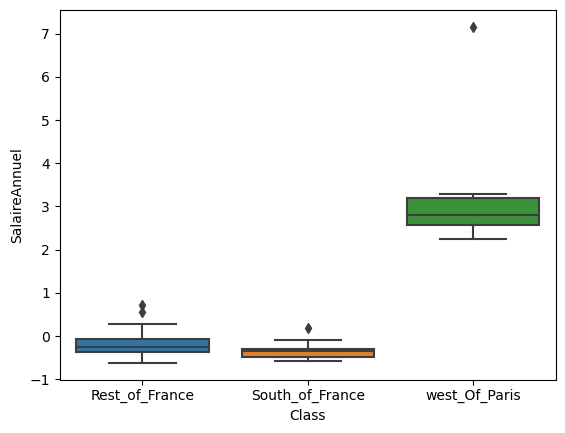

In [47]:
def box_plot_class_var(dataframe, var):
    sns.boxplot(dataframe, x="Class", y=var)
    return plt.show()

box_plot_class_var(df_c, "SalaireAnnuel")

- The box plot of the West Paris class is higher than the other two classes,
indicating a difference in annual salaries between the classes. It also explains
the dispersion of the data points by the values in the West Paris class,
where the variance of the West Paris class is higher than that of the other two
classes: thus, heterogeneity of variances can be observed among the classes.
- It is also notable that Neuilly-sur-Seine is an outlier in the West Paris class.
By using box plots, we can compare the different city classes and interpret their
results for each variable $x^j$.

In [48]:
# This noticeable variance is due to the city of west of Paris (known for having
# rich families and celebrities as residents)
df_class2[["SalaireAnnuel"]]

SalaireAnnuel
Ville                             
boulognebillancourt       2.892476
neuillysurseine           7.160555
paris                     2.238186
rueilmalmaison            2.532699
saintgermainenlaye        3.296547
versailles                2.730140

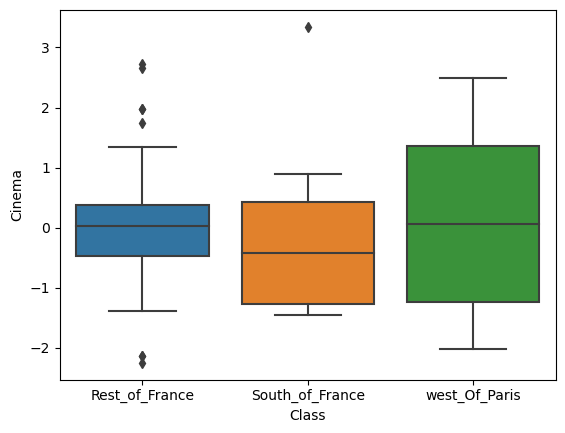

In [49]:
box_plot_class_var(df_c, "Cinema")
# For the variable Cinema we can see there is not a significant variance between classes

Now we will try to optimize the HAC by using k-means simply by :
- Calculating the center of gravity of each class found by HAC
- Initialize the k-means Algorithm with the center of gravities
- Find new optimized classes

In [52]:
# The center of gravity of each class can be found :
def find_center_of_gravity(df_ohe, df):
    Center_of_gravity = np.linalg.inv(df_ohe.T @ df_ohe) @ (df_ohe.T @ df)
    return Center_of_gravity


Center_of_gravity_C3 = find_center_of_gravity(df_3, df_std)
Center_of_gravity_C3

Chomage  ChomageJeunes  ChomageLong  EvoluEmploiCree  Activite  \
0  0.022260      -0.097822     0.023424        -0.001585  0.095113   
1 -0.059909       1.187007     0.489359         0.136247 -1.278431   
2 -0.170702      -1.251255    -1.376502        -0.273799  1.485912   

   EmploiFeminin  EmploiCommune  DefaillEntreprise  SalaireAnnuel  \
0       0.013110       0.062265           0.088067      -0.202349   
1      -0.553168       0.453268          -0.249833      -0.343105   
2       1.021550      -1.822656          -0.647597       3.475101   

   Criminalite  ...  RestaurDistingues    Presse  Etudiants  ImpotRevenu  \
0    -0.071802  ...          -0.106673 -0.089022   0.138116    -0.189975   
1     0.715426  ...          -0.033639  0.272454  -0.673974    -0.240538   
2    -0.580764  ...           1.512964  0.611482  -0.404286     3.085829   

   ImpotFortune  Imposables  EvolDemographique  Vieillissement  \
0     -0.196235   -0.091860           0.115884       -0.138531   
1     -0.093173   -0.845546          -0.667746        0.879979   
2      2.851045    3.072121          -0.117652       -0.036452   

   AttiranceGlobale  AttiranceActifs  
0          0.103577         0.074501  
1         -1.085659        -1.040203  
2          0.953970         1.248014  

[3 rows x 54 columns]

In [53]:
# %%
# Usually i'd use this line of code to fit the k-means algorithm
# KMV2 = KMeans(n_clusters=3,init=CentreC3).fit(df_std)
# But the algorithm used in python didn't do a lot of changes so i used the on in R
# Here is the code to fit K-means in R:
# mIC2Y = as.matrix(IC2Y)
#
# mY = as.matrix(Y)
# CentresC2 = solve(t(mIC2Y)%*%mIC2Y)%*%t(mIC2Y)%*%mY
#
#  K-means à partir de ces centres initiaux:
# KMV2 = kmeans(Y, CentresC2)
#
#  La variable de classe ainsi produite est dans:
# apr_km = KMV2$cluster
#
# Obtenir les noms de la répartition des villes pour chaque groupes avant kmeans
# k1 = rownames(X)[apr_km == 1]
# k2 = rownames(X)[apr_km == 2]
# k3 = rownames(X)[apr_km == 3]

In [60]:
# I copied the result directly from R :
df_km = [
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    2,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    0,
    2,
    0,
    1,
    1,
    0,
    0,
    2,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    2,
    0,
    0,
    0,
    2,
    0,
    0,
    0,
    0,
    1,
    0,
    0,
    1,
    0,
    0,
    0,
    0,
    0,
    0,
    2,
    0,
    0,
]
df_km = np.array(df_km)
# Create a new data set to encode the variable Cities classes
df_km = one_hot_encoding(df_km)
df_km.head()


class_0  class_1  class_2
Ville                                   
agen                 1        0        0
aixenprovence        0        1        0
ajaccio              0        1        0
albi                 1        0        0
amiens               1        0        0

In [61]:
df_class0_opt = filter_df_by_class(df_km, "class_0")
df_class1_opt = filter_df_by_class(df_km, "class_1")
df_class2_opt = filter_df_by_class(df_km, "class_2")

In [62]:
R2_Opt = Calculate_R2(df_km, df_std, show=df_std.shape[0])
R2_Opt.mean()

R_squared    19.667364
dtype: float64

After optimization with K-means, we added 4 individuals to the South of France class:
Aix-en-Provence, Carcassonne, Montpellier, and Castres.
We also calculated the $R^2 $ of the new partition, which is equal to
$R^2 = 0.196674$, an increase of  $0.41\%$.

These are the results of classifying the 100 French cities into 3 classes,
which are not sufficiently homogeneous in number. This heterogeneity can be explained
by analyzing the data by themes to gain more information about each class,
which contributes to the dispersion of these three classes.
- Our next analysis will focus on exploring the similarities within classes
for each theme, which will be the subject of our work.

## HAC by theme

- Thematic classification involves balancing themes by finding a way to move from overall
similarity to partial similarity for greater logic and naturally classifying cities in
a manner based on reality. A city can thus belong to multiple classes. For this,
we will perform a classification by theme.


### Economy

In [63]:
df_eco = df_std[
    [
        "Chomage",
        "ChomageJeunes",
        "ChomageLong",
        "EvoluEmploiCree",
        "Activite",
        "EmploiFeminin",
        "EmploiCommune",
        "DefaillEntreprise",
        "SalaireAnnuel",
        "ImpotRevenu",
        "ImpotFortune",
        "Imposables",
        "MetreCarreAncien",
        "TaxeHabitation",
        "FoncierBati",
        "MetreCubeEau",
        "EvolDemographique",
        "Vieillissement",
        "AttiranceGlobale",
        "AttiranceActifs",
        "Proprietaires",
        "LogtSup4pieces",
        "LogtInsalubre",
        "LogtVacant",
        "LogtConstruction",
    ]
]

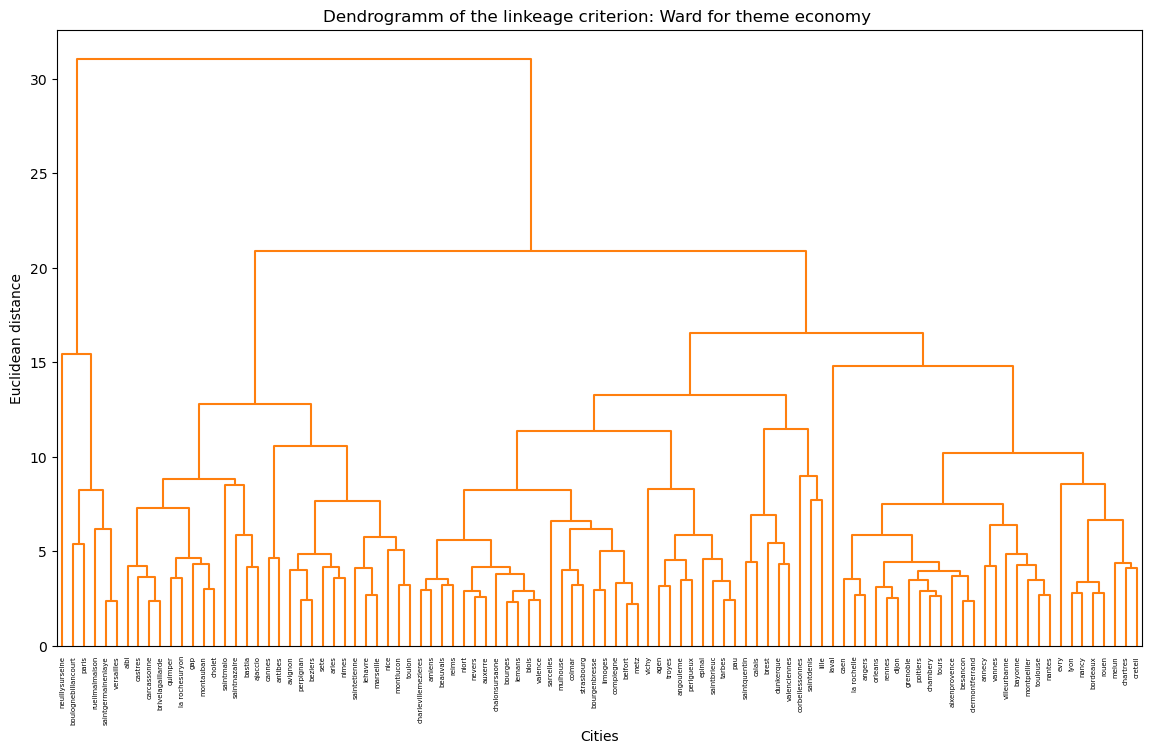

In [64]:
ward_linkeage_eco = linked_method(df_eco, "ward")
plot_dendrogram(ward_linkeage_eco, "Ward for theme economy")

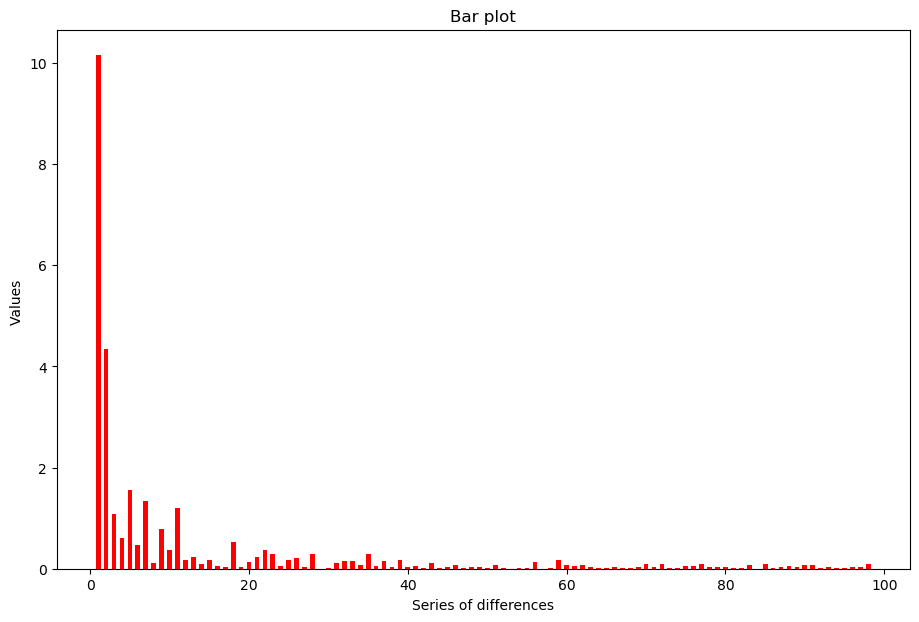

In [65]:
diff_series_econ = diff_series(ward_linkeage_eco)
plot_diff_series(diff_series_econ)

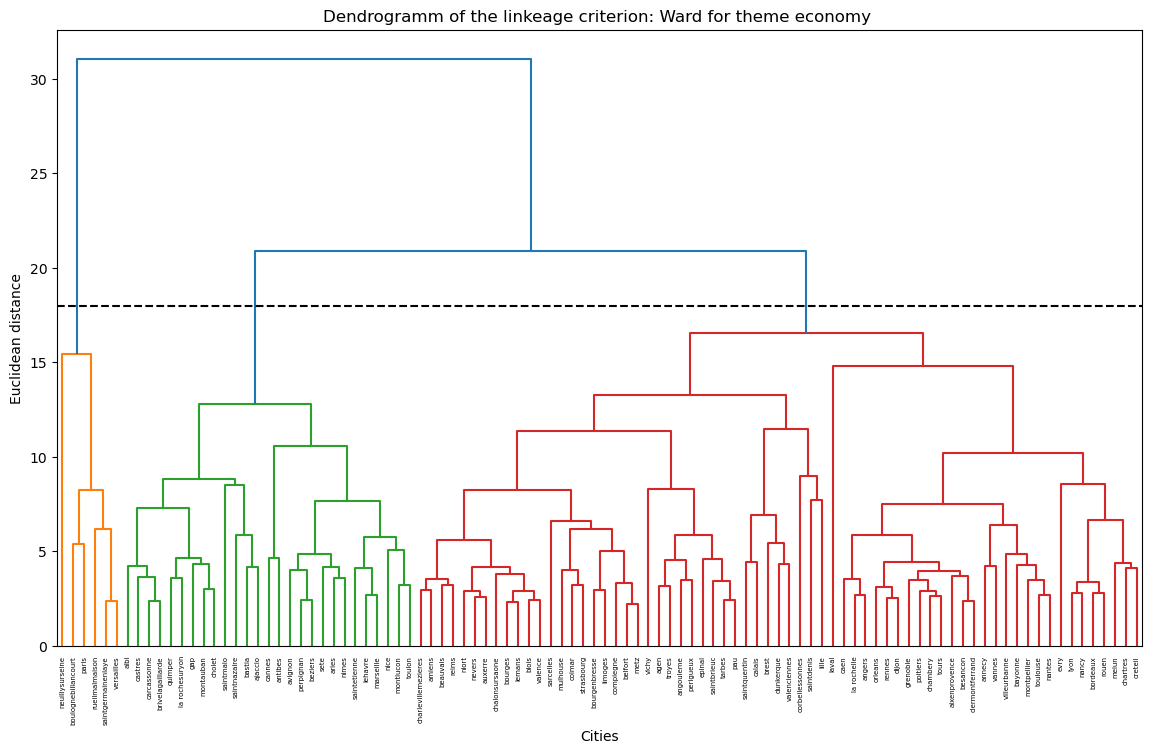

In [66]:
plot_dendrogram(ward_linkeage_eco, "Ward for theme economy", threshold=18)


In [67]:
cut_eco_clusters = cut_tree(ward_linkeage_eco, n_clusters=3)

In [69]:
df_ohe_eco = one_hot_encoding(cut_eco_clusters)
df_ohe_eco.head()

class_0  class_1  class_2
Ville                                   
agen                 1        0        0
aixenprovence        1        0        0
ajaccio              0        1        0
albi                 0        1        0
amiens               1        0        0

In [70]:
df_class0_eco = filter_df_by_class(df_ohe_eco, "class_0")
df_class1_eco = filter_df_by_class(df_ohe_eco, "class_1")
df_class2_eco = filter_df_by_class(df_ohe_eco, "class_2")

In [71]:
R2_eco = Calculate_R2(df_ohe_eco, df_eco)
R2_eco

R_squared
SalaireAnnuel     77.620583
MetreCarreAncien  70.193635
Imposables        63.946110
ImpotRevenu       60.901990
ImpotFortune      51.885466

In [72]:
R2_eco_total = Calculate_R2(df_ohe_eco, df_eco, show=df_eco.shape[0]).mean()
R2_eco_total


R_squared    27.974982
dtype: float64

In [74]:
classes_cities_eco = {0: "Low_econ_class", 1: "Middle_econ_class", 2: "Rich_econ_class"}
df_c_eco = create_df_with_classes(df_eco, cut_eco_clusters, classes_cities_eco)
df_c_eco.head()


Chomage  ChomageJeunes  ChomageLong  EvoluEmploiCree  \
Ville                                                                  
agen          -0.085165       0.343521     0.781258         0.210801   
aixenprovence -0.098694      -0.488536     0.111608         1.422300   
ajaccio       -0.098694       0.937847    -0.558041        -0.516099   
albi          -0.118538       0.046357    -0.111608         0.210801   
amiens        -0.068027       0.462386     1.450907         0.210801   

               Activite  EmploiFeminin  EmploiCommune  DefaillEntreprise  \
Ville                                                                      
agen          -0.186893       1.424926       0.026532           0.583576   
aixenprovence -0.532990      -0.390266       0.106931          -0.647597   
ajaccio       -0.532990      -0.692798       1.714921          -0.401362   
albi          -0.879087       0.819862       0.910926          -1.632535   
amiens        -0.186893      -0.692798       0.669728           0.337341   

               SalaireAnnuel  ImpotRevenu  ...  EvolDemographique  \
Ville                                      ...                      
agen               -0.467561    -0.342473  ...          -0.585842   
aixenprovence       0.715673     0.372326  ...           1.611632   
ajaccio            -0.309231    -0.247528  ...          -2.624735   
albi               -0.299571    -0.221757  ...          -0.449916   
amiens             -0.272712    -0.246850  ...           0.342987   

               Vieillissement  AttiranceGlobale  AttiranceActifs  \
Ville                                                              
agen                 1.141573          0.809866         1.383227   
aixenprovence       -0.125360          0.665761         0.301525   
ajaccio             -0.125360         -1.928114        -2.132306   
albi                 1.341615         -0.198864        -0.239327   
amiens              -0.992208         -0.919385        -1.185816   

               Proprietaires  LogtSup4pieces  LogtInsalubre  LogtVacant  \
Ville                                                                     
agen               -0.778825       -0.130311      -0.396212    1.021466   
aixenprovence      -0.237034       -0.237123      -0.900299    0.133235   
ajaccio             0.846549        0.403749      -0.799482    0.133235   
albi                1.523787        1.578681      -0.799482   -0.310881   
amiens             -0.372481        0.403749       1.922587   -0.754997   

               LogtConstruction              Class  
Ville                                               
agen                   0.545828     Low_econ_class  
aixenprovence         -0.568106     Low_econ_class  
ajaccio                1.659762  Middle_econ_class  
albi                   0.323041  Middle_econ_class  
amiens                -1.236467     Low_econ_class  

[5 rows x 26 columns]

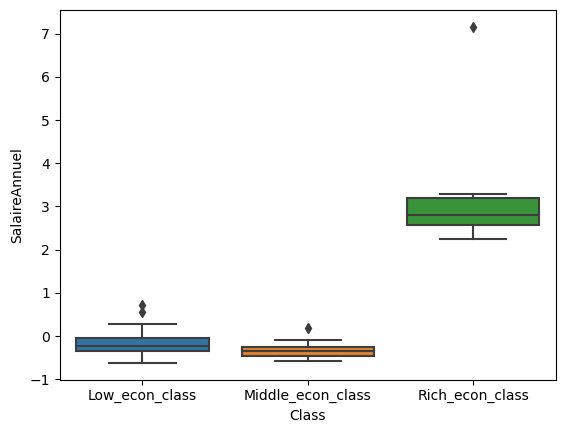

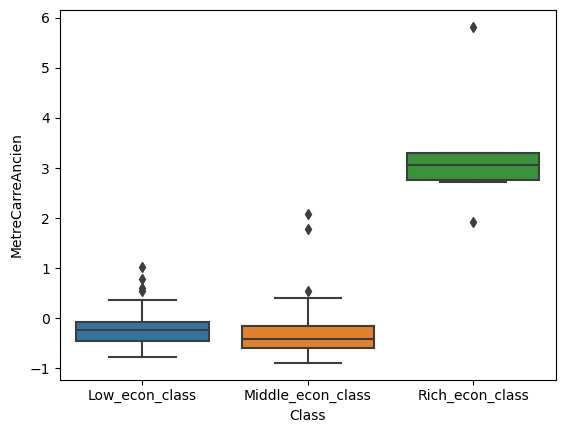

In [75]:
box_plot_class_var(df_c_eco, "SalaireAnnuel")
box_plot_class_var(df_c_eco, "MetreCarreAncien")

In [76]:
Center_of_gravity_eco = find_center_of_gravity(df_ohe_eco, df_eco)
Center_of_gravity_eco

Chomage  ChomageJeunes  ChomageLong  EvoluEmploiCree  Activite  \
0  0.049620      -0.140811    -0.034982        -0.031499  0.179867   
1 -0.085198       0.627477     0.392696         0.139008 -0.776540   
2 -0.170702      -1.251255    -1.376502        -0.273799  1.485912   

   EmploiFeminin  EmploiCommune  DefaillEntreprise  SalaireAnnuel  \
0       0.147067      -0.112667           0.223412      -0.173805   
1      -0.591954       0.684617          -0.410482      -0.340951   
2       1.021550      -1.822656          -0.647597       3.475101   

   ImpotRevenu  ...  MetreCubeEau  EvolDemographique  Vieillissement  \
0    -0.174184  ...     -0.130328           0.174601       -0.210950   
1    -0.253506  ...      0.272521          -0.407124        0.531568   
2     3.085829  ...      0.228979          -0.117652       -0.036452   

   AttiranceGlobale  AttiranceActifs  Proprietaires  LogtSup4pieces  \
0          0.313029         0.275289      -0.459411       -0.101615   
1         -0.988768        -0.960462       1.087345        0.474957   
2          0.953970         1.248014       0.237034       -1.002609   

   LogtInsalubre  LogtVacant  LogtConstruction  
0       0.047685    0.013920         -0.155784  
1      -0.448488   -0.031253          0.537576  
2       1.485712   -0.014804         -0.679500  

[3 rows x 25 columns]

In [78]:
km_eco = [
    1,
    1,
    2,
    2,
    2,
    1,
    1,
    1,
    1,
    2,
    1,
    2,
    2,
    1,
    2,
    1,
    1,
    2,
    1,
    1,
    3,
    1,
    2,
    2,
    2,
    1,
    2,
    2,
    2,
    2,
    2,
    1,
    2,
    1,
    2,
    1,
    1,
    1,
    1,
    1,
    1,
    2,
    1,
    1,
    2,
    1,
    1,
    2,
    1,
    2,
    2,
    1,
    1,
    1,
    2,
    1,
    1,
    2,
    2,
    1,
    1,
    1,
    1,
    3,
    1,
    2,
    2,
    2,
    1,
    3,
    1,
    1,
    2,
    1,
    2,
    1,
    1,
    1,
    3,
    1,
    1,
    2,
    3,
    2,
    2,
    2,
    1,
    2,
    1,
    1,
    2,
    1,
    1,
    1,
    2,
    1,
    1,
    3,
    1,
    1,
]
km_eco = np.array(km_eco)
df_km_eco = one_hot_encoding(km_eco)
df_km_eco.head()

class_1  class_2  class_3
Ville                                   
agen                 1        0        0
aixenprovence        1        0        0
ajaccio              0        1        0
albi                 0        1        0
amiens               0        1        0

In [79]:
df_class0_eco_opt = filter_df_by_class(df_km_eco, "class_1")
df_class1_eco_opt = filter_df_by_class(df_km_eco, "class_2")
df_class2_eco_opt = filter_df_by_class(df_km_eco, "class_3")

In [80]:
R2_eco_opt = Calculate_R2(df_km_eco, df_eco)
R2_eco_opt_total = Calculate_R2(df_km_eco, df_eco, show=df_eco.shape[0]).mean()
R2_eco_opt_total

R_squared    30.114096
dtype: float64


Here's the translated text without LaTeX format:

- The first class ("Agen", "AixEnProvence", "Amiens", "Angers", "Angouleme", "Annecy",
"Auxerre", "Avignon", ...., "Strasbourg", "Tarbes", "Toulouse", "Tours", "Troyes",
"Valence", "Valenciennes", "Vannes", "Villeurbanne") is composed of 65 individuals
before K-means.

- The second class ("Ajaccio", "Albi", "Antibes", "Arles", "Bastia", "Beziers", ...,
"Marseille", "Montauban", "Montlucon", "Nice", "Nimes", "Perpignan", "Quimper",
"SaintEtienne", "SaintMalo", "SaintNazaire", "SaintQuentin", "Sete", "Toulon", "Vichy")
is composed of 29 individuals before K-means.

- The third class ("BoulogneBillancourt", "NeuillySurSeine", "Paris", "RueilMalmaison",
"SaintGermainEnLaye", "Versailles") is composed of 6 individuals.

Now let's move on to the optimization of these classes using K-means: we calculated the
centroids of each class in the economic theme, then we ran the K-means algorithm and
found the following results:

- The first class went from 65 individuals to 56 after optimization,
losing some individuals. This class can be described as disadvantaged or
low class.

- The second class went from 29 individuals to 38 individuals, thus undergoing
optimization as it was enriched by 9 new individuals. This class can be described as
moderate or middle class.

- The third class did not undergo any optimization and remains stable. This class
can be described as wealthy or rich class.


## Risk

In [81]:
df_risk = df_std[
    [
        "Criminalite",
        "EvolutionCrimes",
        "SecuriteRoutiere",
        "Inondations",
        "TerrainsPollues",
        "UsinesRisques",
        "MortaliteInfantile",
        "MortaliteCancerPoumon",
        "MortaliteAlcool",
        "DecesInfarctus",
        "TauxSuicide",
        "MortaliteGlobale",
        "TailleClassesPrimaires",
        "Retard6eme",
        "Retard3eme",
        "RetardTerminale",
    ]
]

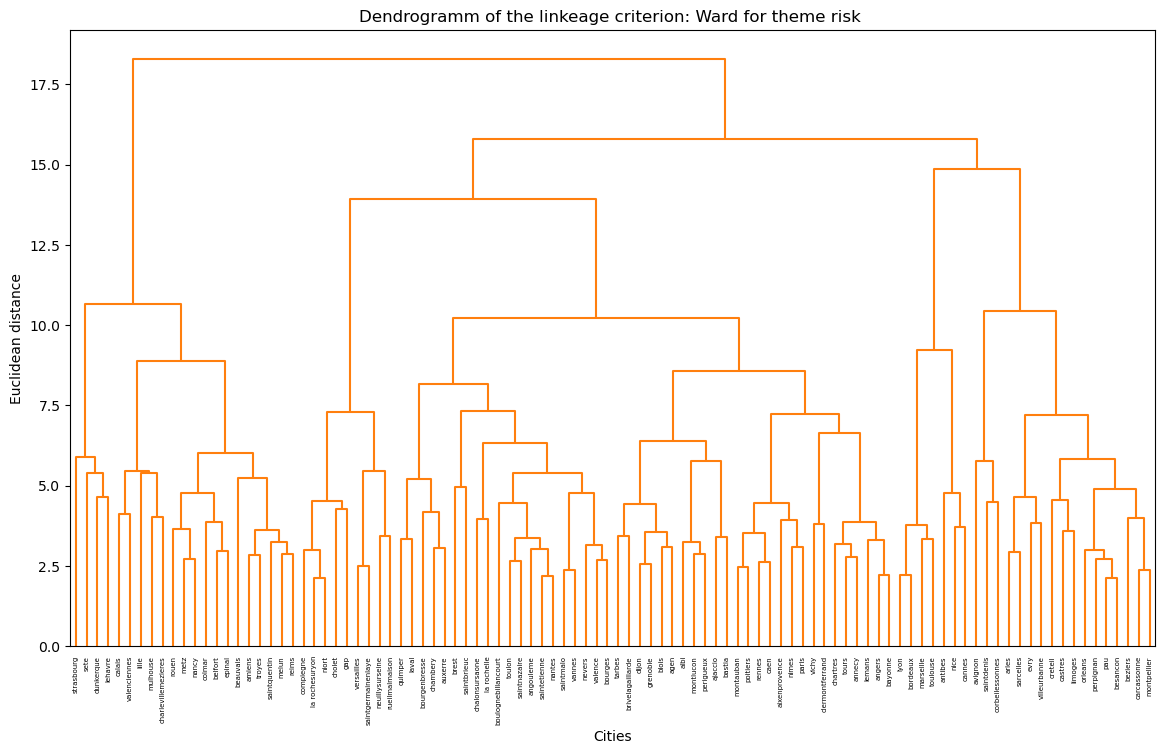

In [82]:
ward_linkeage_risk = linked_method(df_risk, "ward")
plot_dendrogram(ward_linkeage_risk, "Ward for theme risk")

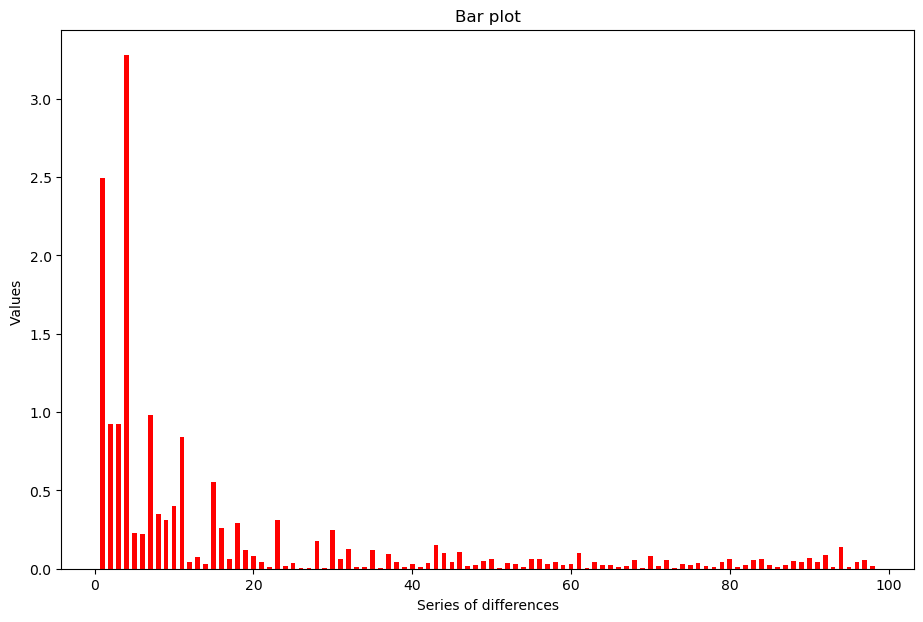

In [83]:
diff_series_risk = diff_series(ward_linkeage_risk)
plot_diff_series(diff_series_risk)

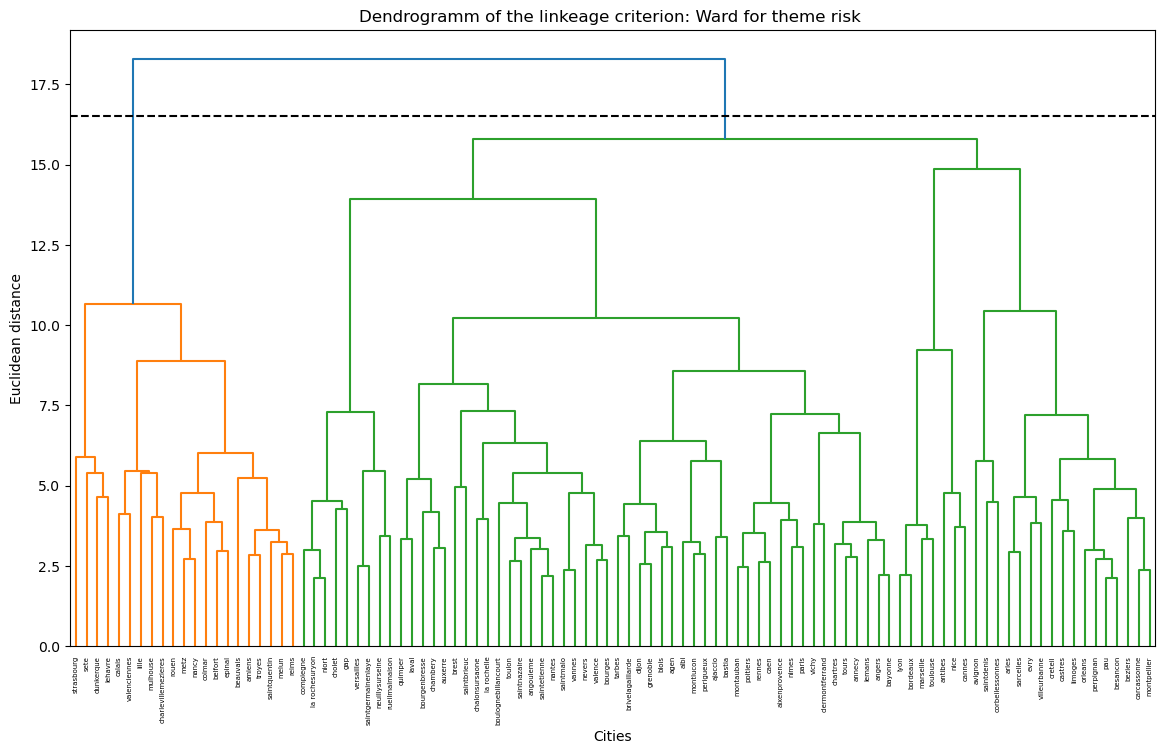

In [84]:
plot_dendrogram(ward_linkeage_risk, "Ward for theme risk", threshold=16.5)

In [85]:
cut_risk_clusters = cut_tree(ward_linkeage_risk, n_clusters=2)

In [88]:
df_ohe_risk = one_hot_encoding(cut_risk_clusters)
df_ohe_risk.head()

class_0  class_1
Ville                          
agen                 1        0
aixenprovence        1        0
ajaccio              1        0
albi                 1        0
amiens               0        1

In [89]:
df_class0_risk = filter_df_by_class(df_ohe_risk, "class_0")
df_class1_risk = filter_df_by_class(df_ohe_risk, "class_1")
df_class0_risk.head()

Chomage  ChomageJeunes  ChomageLong  EvoluEmploiCree  \
Ville                                                                  
agen          -0.085165       0.343521     0.781258         0.210801   
aixenprovence -0.098694      -0.488536     0.111608         1.422300   
ajaccio       -0.098694       0.937847    -0.558041        -0.516099   
albi          -0.118538       0.046357    -0.111608         0.210801   
angers        -0.106812       0.432670     0.334825        -0.516099   

               Activite  EmploiFeminin  EmploiCommune  DefaillEntreprise  \
Ville                                                                      
agen          -0.186893       1.424926       0.026532           0.583576   
aixenprovence -0.532990      -0.390266       0.106931          -0.647597   
ajaccio       -0.532990      -0.692798       1.714921          -0.401362   
albi          -0.879087       0.819862       0.910926          -1.632535   
angers        -0.532990       0.819862       0.348130          -1.140066   

               SalaireAnnuel  Criminalite  ...  RestaurDistingues    Presse  \
Ville                                      ...                                
agen               -0.467561     0.556890  ...          -0.223449  2.054179   
aixenprovence       0.715673     1.314852  ...          -0.086364 -0.014744   
ajaccio            -0.309231    -1.567961  ...          -0.086364  1.055388   
albi               -0.299571    -1.018651  ...          -0.223449  0.508432   
angers             -0.286142    -0.656702  ...          -0.223449 -0.870850   

               Etudiants  ImpotRevenu  ImpotFortune  Imposables  \
Ville                                                             
agen           -0.424320    -0.342473     -0.285327   -0.876971   
aixenprovence   2.580777     0.372326      0.269783    0.620961   
ajaccio        -1.025339    -0.247528     -0.340837   -0.740795   
albi           -0.304116    -0.221757     -0.340837   -0.196093   
angers          1.018127    -0.229896     -0.174305   -0.196093   

               EvolDemographique  Vieillissement  AttiranceGlobale  \
Ville                                                                
agen                   -0.585842        1.141573          0.809866   
aixenprovence           1.611632       -0.125360          0.665761   
ajaccio                -2.624735       -0.125360         -1.928114   
albi                   -0.449916        1.341615         -0.198864   
angers                  1.294471       -0.325402          0.809866   

               AttiranceActifs  
Ville                           
agen                  1.383227  
aixenprovence         0.301525  
ajaccio              -2.132306  
albi                 -0.239327  
angers                0.436737  

[5 rows x 54 columns]

In [90]:
R2_risk = Calculate_R2(df_ohe_risk, df_risk)
R2_risk

R_squared
MortaliteGlobale       40.421038
DecesInfarctus         33.298030
MortaliteAlcool        30.985045
MortaliteCancerPoumon  26.679546
UsinesRisques           8.486330

In [91]:
R2_risk_total = Calculate_R2(df_ohe_risk, df_risk, show=df_risk.shape[0]).mean()
R2_risk_total

R_squared    10.444208
dtype: float64

In [93]:
classes_cities_risk = {0: "Safe", 1: "Risky"}
df_c_risk = create_df_with_classes(df_risk, cut_risk_clusters, classes_cities_risk)
df_c_risk.head()

Criminalite  EvolutionCrimes  SecuriteRoutiere  Inondations  \
Ville                                                                        
agen              0.556890        -0.742513         -0.129112    -0.440169   
aixenprovence     1.314852        -0.536760         -0.617353    -0.440169   
ajaccio          -1.567961         0.946381          1.715351    -0.440169   
albi             -1.018651         0.303401         -0.834348    -0.170127   
amiens            1.033810        -0.056668         -0.237610    -0.440169   

               TerrainsPollues  UsinesRisques  MortaliteInfantile  \
Ville                                                               
agen                 -0.663738      -0.529209           -1.436762   
aixenprovence        -0.663738      -0.529209           -0.629592   
ajaccio              -0.663738       1.559774           -0.744902   
albi                 -0.078087      -0.529209           -2.474552   
amiens                0.312348       0.167119            1.100057   

               MortaliteCancerPoumon  MortaliteAlcool  DecesInfarctus  \
Ville                                                                   
agen                        0.715819        -0.537977       -1.380829   
aixenprovence              -1.019574        -1.170473       -1.215890   
ajaccio                     1.097360        -1.035446        0.096454   
albi                        0.161970        -0.964379       -0.168884   
amiens                      0.974282         0.727015        0.196852   

               TauxSuicide  MortaliteGlobale  TailleClassesPrimaires  \
Ville                                                                  
agen             -0.382958         -0.853783               -1.169274   
aixenprovence    -0.811192         -1.141333                1.243861   
ajaccio          -0.889053          0.571414                0.878235   
albi              0.376184         -0.541130               -0.803647   
amiens            0.123137          0.986764               -1.169274   

               Retard6eme  Retard3eme  RetardTerminale  Class  
Ville                                                          
agen             0.589368   -0.834850         0.576925   Safe  
aixenprovence   -1.463985   -1.024588        -0.153690   Safe  
ajaccio          0.755856   -0.202388        -0.571185   Safe  
albi            -0.243073    0.461697        -1.066959   Safe  
amiens          -0.798033   -0.328880         0.837859  Risky

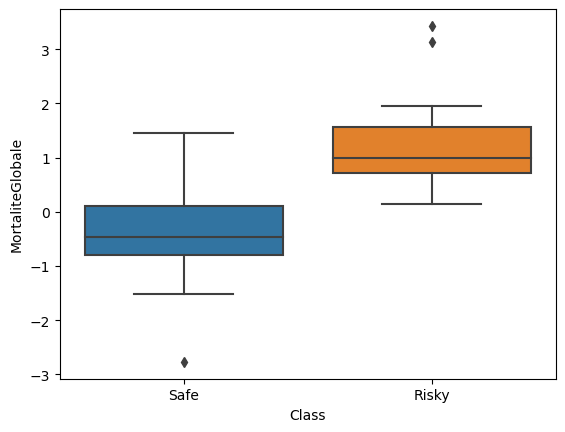

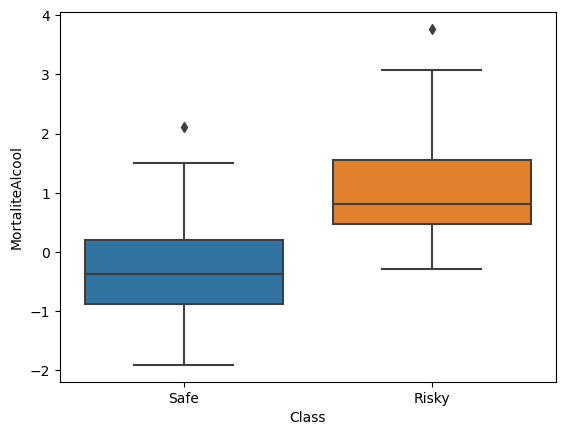

In [94]:
box_plot_class_var(df_c_risk, "MortaliteGlobale")
box_plot_class_var(df_c_risk, "MortaliteAlcool")

In [95]:
Center_of_gravity_risk = find_center_of_gravity(df_ohe_risk, df_risk)
Center_of_gravity_risk

Criminalite  EvolutionCrimes  SecuriteRoutiere  Inondations  \
0     0.006879         0.072362          0.097497    -0.043651   
1    -0.025878        -0.272219         -0.366774     0.164212   

   TerrainsPollues  UsinesRisques  MortaliteInfantile  MortaliteCancerPoumon  \
0        -0.142336      -0.150195           -0.136241              -0.266309   
1         0.535453       0.565020            0.512525               1.001828   

   MortaliteAlcool  DecesInfarctus  TauxSuicide  MortaliteGlobale  \
0        -0.286994       -0.297513     0.025762         -0.327793   
1         1.079642        1.119214    -0.096912          1.233127   

   TailleClassesPrimaires  Retard6eme  Retard3eme  RetardTerminale  
0                0.019244    0.102548    0.067810        -0.027187  
1               -0.072394   -0.385777   -0.255093         0.102274

In [96]:
# Optimisation with k-means
km_risk = [
    1,
    1,
    1,
    1,
    2,
    1,
    2,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    2,
    2,
    1,
    1,
    1,
    2,
    1,
    1,
    1,
    2,
    1,
    1,
    2,
    1,
    1,
    1,
    2,
    1,
    2,
    1,
    1,
    2,
    2,
    1,
    2,
    1,
    1,
    2,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    2,
    1,
    2,
    1,
    1,
    2,
    2,
    2,
    1,
    2,
    1,
    2,
    2,
    1,
    1,
    2,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    2,
    1,
    2,
    1,
    2,
    2,
    1,
    1,
    2,
    2,
    2,
    2,
    2,
    2,
    1,
    1,
    1,
    1,
    2,
    1,
    2,
    1,
    1,
    2,
    1,
]
km_risk = np.array(km_risk)
df_km_risk = one_hot_encoding(km_risk)


In [97]:
df_class0_risk_opt = filter_df_by_class(df_km_risk, "class_1")
df_class1_risk_opt = filter_df_by_class(df_km_risk, "class_2")

In [98]:
R2_risk_opt = Calculate_R2(df_km_risk, df_risk)
R2_risk_opt

R_squared
MortaliteGlobale       54.123910
MortaliteAlcool        43.243449
DecesInfarctus         30.095364
MortaliteCancerPoumon  28.053367
TerrainsPollues        12.102988

In [99]:
R2_risk_opt_total = Calculate_R2(df_km_risk, df_risk, show=df_risk.shape[0]).mean()
R2_risk_opt_total

R_squared    12.803901
dtype: float64

- The first class ("Agen", "AixEnProvence", "Ajaccio", "Albi", "Angers", "Angouleme",
..., "Sarcelles", "Tarbes", "Toulon", "Tours", "Valence", "Vannes", "Versailles", "Vichy",
"Villeurbanne") is composed of three-fourths of the individuals before K-means.

- The second class ("Amiens", "Beauvais", "Belfort", "Bordeaux", "Calais",
"CharlevilleMezieres", "Colmar", "Dunkerque", "Epinal", ..., "Mulhouse", "Nancy",
"Reims", "Rouen", "SaintQuentin", "Sete", "Strasbourg", "Toulouse", "Troyes", "Valenciennes") is composed of one-fourth of the individuals before K-means.

After optimization with k-means : 

- The first class went from 75 individuals to 65 after optimization, losing some
individuals. This class can be described as safe.

- The second class went from 25 individuals to 35 individuals, thus undergoing
as it was enriched by 10 new individuals. This class can be described as risky.

## Nature

In [100]:
df_nature = df_std[["Mer", "Ski", "Soleil", "Pluie", "Temperature", "MarcheAPied"]]
df_nature.head()

Mer       Ski    Soleil     Pluie  Temperature  \
Ville                                                                
agen           0.337869 -0.685994 -0.009346  0.120793     0.597548   
aixenprovence  0.337869 -0.685994  2.403671 -2.152080     1.186264   
ajaccio        1.689343  1.457738  2.123285 -1.507731     1.892724   
albi          -1.013606 -0.685994  0.254047 -0.121941     0.891906   
amiens         0.337869 -0.685994 -0.989280  0.734248    -1.050859   

               MarcheAPied  
Ville                       
agen              1.712199  
aixenprovence    -0.384371  
ajaccio           0.314485  
albi             -0.733799  
amiens           -0.034943

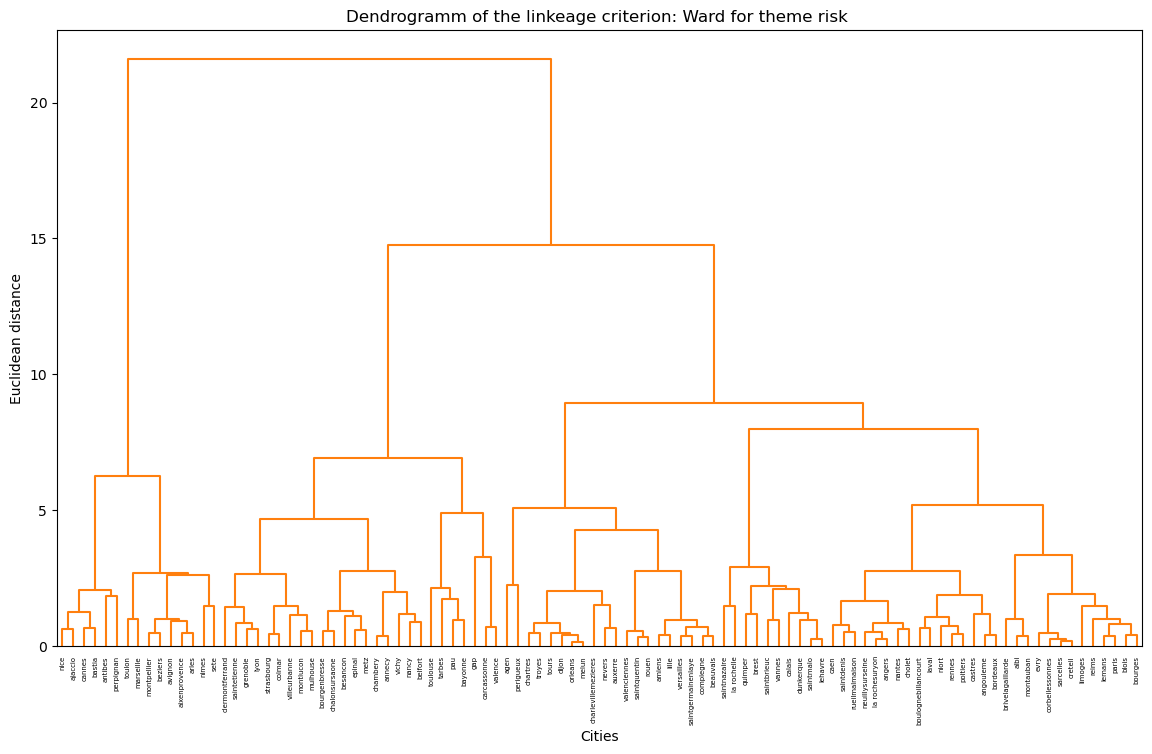

In [101]:
ward_linkeage_nature = linked_method(df_nature, "ward")
plot_dendrogram(ward_linkeage_nature, "Ward for theme risk")


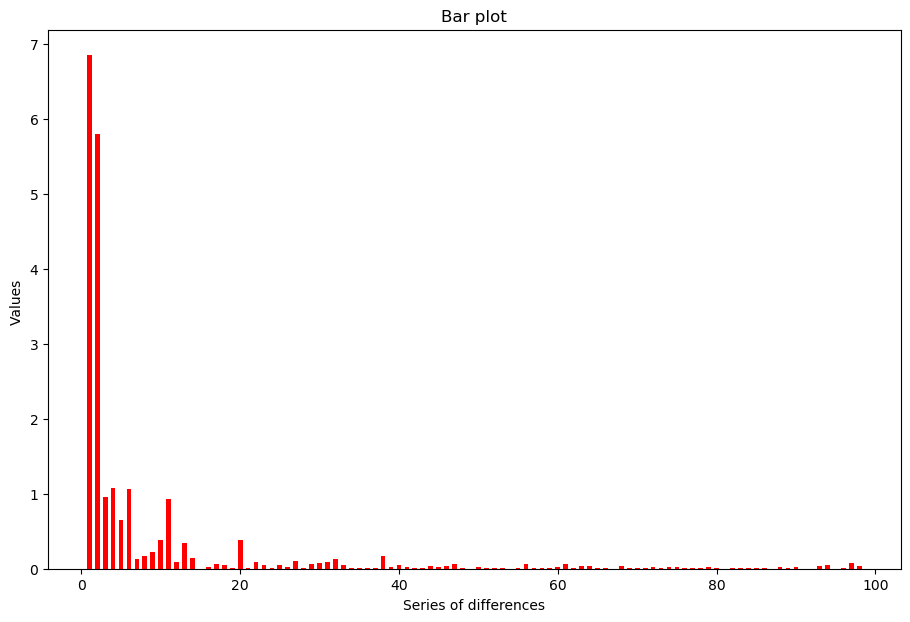

In [102]:
diff_series_nature = diff_series(ward_linkeage_nature)
plot_diff_series(diff_series_nature)


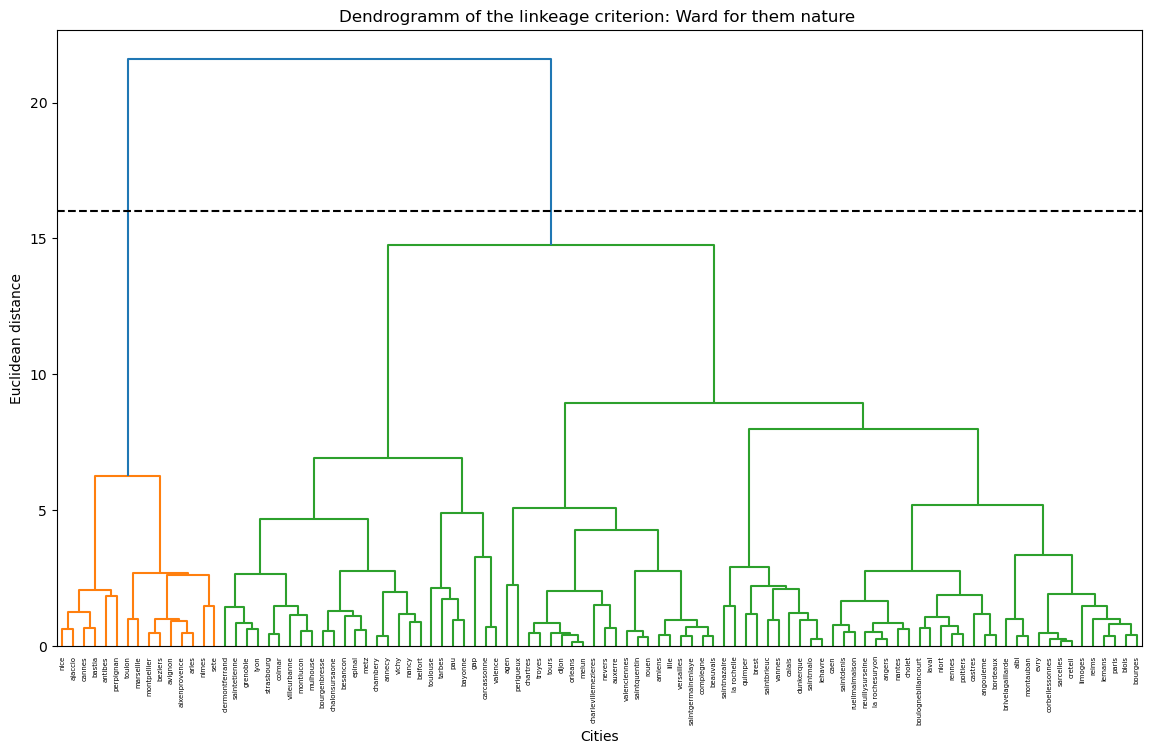

In [103]:
plot_dendrogram(ward_linkeage_nature, "Ward for them nature", threshold=16)


In [104]:
cut_nature_clusters = cut_tree(ward_linkeage_nature, n_clusters=2)


In [105]:
df_ohe_nature = one_hot_encoding(cut_nature_clusters)
df_ohe_nature

class_0  class_1
Ville                          
agen                 1        0
aixenprovence        0        1
ajaccio              0        1
albi                 1        0
amiens               1        0
...                ...      ...
valenciennes         1        0
vannes               1        0
versailles           1        0
vichy                1        0
villeurbanne         1        0

[100 rows x 2 columns]

In [107]:
df_class0_nature = filter_df_by_class(df_ohe_nature, "class_0")
df_class1_nature = filter_df_by_class(df_ohe_nature, "class_1")
df_class1_nature.head()

Chomage  ChomageJeunes  ChomageLong  EvoluEmploiCree  \
Ville                                                                  
aixenprovence -0.098694      -0.488536     0.111608         1.422300   
ajaccio       -0.098694       0.937847    -0.558041        -0.516099   
antibes       -0.110420       1.443024    -1.227691         0.210801   
arles         -0.063517       1.443024     1.450907         1.422300   
avignon       -0.056301       1.353875     0.111608        -0.273799   

               Activite  EmploiFeminin  EmploiCommune  DefaillEntreprise  \
Ville                                                                      
aixenprovence -0.532990      -0.390266       0.106931          -0.647597   
ajaccio       -0.532990      -0.692798       1.714921          -0.401362   
antibes       -0.532990      -0.390266      -0.214667          -0.155128   
arles         -0.879087      -0.692798       0.508929          -0.893831   
avignon       -0.879087      -0.087734       0.187331           0.829810   

               SalaireAnnuel  Criminalite  ...  RestaurDistingues    Presse  \
Ville                                      ...                                
aixenprovence       0.715673     1.314852  ...          -0.086364 -0.014744   
ajaccio            -0.309231    -1.567961  ...          -0.086364  1.055388   
antibes             0.188142     1.101941  ...          -0.086364  0.793800   
arles              -0.343395    -0.652444  ...          -0.223449 -0.609262   
avignon            -0.407481     3.303440  ...           0.461977  0.555993   

               Etudiants  ImpotRevenu  ImpotFortune  Imposables  \
Ville                                                             
aixenprovence   2.580777     0.372326      0.269783    0.620961   
ajaccio        -1.025339    -0.247528     -0.340837   -0.740795   
antibes        -1.025339     0.136999      0.380805    0.757136   
arles          -1.025339    -0.391302     -0.285327   -1.149322   
avignon         0.056496    -0.385876     -0.229816   -1.149322   

               EvolDemographique  Vieillissement  AttiranceGlobale  \
Ville                                                                
aixenprovence           1.611632       -0.125360          0.665761   
ajaccio                -2.624735       -0.125360         -1.928114   
antibes                 0.478913        1.675018         -0.054760   
arles                  -0.970966       -0.125360         -1.784010   
avignon                -0.563188       -0.258721         -0.487072   

               AttiranceActifs  
Ville                           
aixenprovence         0.301525  
ajaccio              -2.132306  
antibes              -0.104114  
arles                -1.861880  
avignon              -0.374539  

[5 rows x 54 columns]

In [108]:
R2_nature = Calculate_R2(df_ohe_nature, df_nature)
R2_nature.head()

R_squared
Pluie        75.014589
Soleil       74.779674
Temperature  62.174537
Mer          19.777957
MarcheAPied   0.864277

In [109]:
R2_nature_total = Calculate_R2(df_ohe_nature, df_nature, show=df_nature.shape[0]).mean()
R2_nature_total

R_squared    38.855011
dtype: float64

In [111]:
classes_cities_nature = {0: "Inland_city", 1: "Coastal_city"}
df_c_nature = create_df_with_classes(
    df_nature, cut_nature_clusters, classes_cities_nature
)
df_c_risk.head()

Criminalite  EvolutionCrimes  SecuriteRoutiere  Inondations  \
Ville                                                                        
agen              0.556890        -0.742513         -0.129112    -0.440169   
aixenprovence     1.314852        -0.536760         -0.617353    -0.440169   
ajaccio          -1.567961         0.946381          1.715351    -0.440169   
albi             -1.018651         0.303401         -0.834348    -0.170127   
amiens            1.033810        -0.056668         -0.237610    -0.440169   

               TerrainsPollues  UsinesRisques  MortaliteInfantile  \
Ville                                                               
agen                 -0.663738      -0.529209           -1.436762   
aixenprovence        -0.663738      -0.529209           -0.629592   
ajaccio              -0.663738       1.559774           -0.744902   
albi                 -0.078087      -0.529209           -2.474552   
amiens                0.312348       0.167119            1.100057   

               MortaliteCancerPoumon  MortaliteAlcool  DecesInfarctus  \
Ville                                                                   
agen                        0.715819        -0.537977       -1.380829   
aixenprovence              -1.019574        -1.170473       -1.215890   
ajaccio                     1.097360        -1.035446        0.096454   
albi                        0.161970        -0.964379       -0.168884   
amiens                      0.974282         0.727015        0.196852   

               TauxSuicide  MortaliteGlobale  TailleClassesPrimaires  \
Ville                                                                  
agen             -0.382958         -0.853783               -1.169274   
aixenprovence    -0.811192         -1.141333                1.243861   
ajaccio          -0.889053          0.571414                0.878235   
albi              0.376184         -0.541130               -0.803647   
amiens            0.123137          0.986764               -1.169274   

               Retard6eme  Retard3eme  RetardTerminale  Class  
Ville                                                          
agen             0.589368   -0.834850         0.576925   Safe  
aixenprovence   -1.463985   -1.024588        -0.153690   Safe  
ajaccio          0.755856   -0.202388        -0.571185   Safe  
albi            -0.243073    0.461697        -1.066959   Safe  
amiens          -0.798033   -0.328880         0.837859  Risky

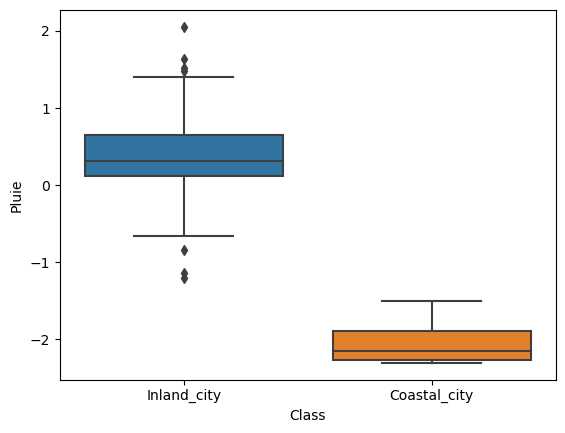

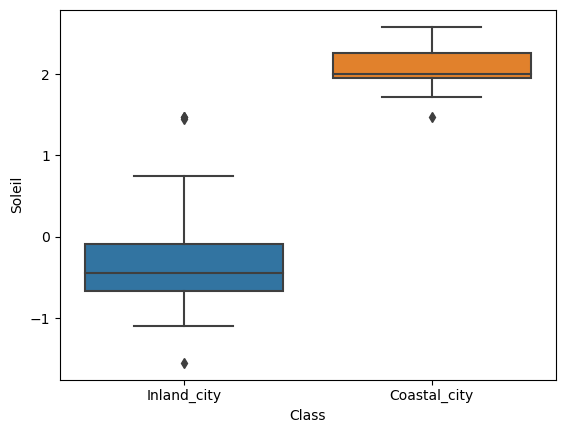

In [112]:
box_plot_class_var(df_c_nature, "Pluie")
box_plot_class_var(df_c_nature, "Soleil")

In [113]:
Center_of_gravity_nature = find_center_of_gravity(df_ohe_nature, df_nature)
Center_of_gravity_nature.head()

Mer       Ski    Soleil     Pluie  Temperature  MarcheAPied
0 -0.186822 -0.030264 -0.363269  0.363839    -0.331240    -0.039054
1  1.058655  0.171499  2.058522 -2.061753     1.877025     0.221305

In [114]:
# Optimization of HCA with k-means
km_nature = [
    1,
    2,
    2,
    1,
    1,
    1,
    1,
    1,
    2,
    2,
    1,
    2,
    2,
    1,
    1,
    1,
    1,
    2,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    2,
    2,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    2,
    1,
    1,
    1,
    1,
    2,
    1,
    1,
    1,
    1,
    1,
    2,
    2,
    1,
    1,
    1,
    1,
    1,
    2,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    2,
    1,
    1,
    2,
    1,
    1,
    1,
    2,
    1,
    1,
    1,
    1,
    1,
]
km_nature = np.array(km_nature)
df_km_nature = one_hot_encoding(km_nature)

In [115]:
df_class0_nature_opt = filter_df_by_class(df_km_nature, "class_1")
df_class1_nature_opt = filter_df_by_class(df_km_nature, "class_2")


In [116]:
R2_nature_opt = Calculate_R2(df_km_nature, df_nature)
R2_nature_opt

R_squared
Soleil       80.934512
Pluie        76.179076
Temperature  64.277940
Mer          19.425001
Ski           2.134490

In [117]:
R2_nature_opt_total = Calculate_R2(
    df_km_nature, df_nature, show=df_nature.shape[0]
).mean()
R2_nature_opt_total

R_squared    40.644844
dtype: float64

We optimize the partition using K-means with the centroids of the two classes obtained
with hierarchical clustering and obtain the following two classes:

- The first class ("Agen", "Albi", "Amiens", "Angers", "Angouleme", ..., "Strasbourg",
"Tarbes", "Toulouse", "Tours", "Troyes", "Valenciennes", "Vannes", "Versailles", "Vichy",
"Villeurbanne") is composed of 83 individuals before and after K-means optimization;
this class of cities can be described as: Inland Cities

- The second class ("AixEnProvence", "Ajaccio", "Antibes", "Arles", "Avignon",
"Bastia", "Beziers", "Cannes", "Carcassonne", "Marseille", "Montpellier", "Nice",
"Nimes", "Perpignan", "Sete", "Toulon", "Valence") is composed of 17 individuals
before and after K-means optimization; this class can be described according to the
nature theme as: Coastal Cities

## Culture

In [118]:
df_culture = df_std[
    [
        "Musees",
        "Cinema",
        "MonumHistoriques",
        "PretLivres",
        "RestaurDistingues",
        "Presse",
        "Etudiants",
    ]
]
df_culture.head()

Musees    Cinema  MonumHistoriques  PretLivres  \
Ville                                                             
agen          -0.382704 -0.593366         -0.289896   -0.383832   
aixenprovence  0.194962  0.034233          0.972517    0.013040   
ajaccio       -0.238287 -1.449183         -0.335802   -0.043656   
albi          -0.382704 -0.650421         -0.289896   -0.043656   
amiens        -0.238287 -0.079876         -0.175131   -0.610615   

               RestaurDistingues    Presse  Etudiants  
Ville                                                  
agen                   -0.223449  2.054179  -0.424320  
aixenprovence          -0.086364 -0.014744   2.580777  
ajaccio                -0.086364  1.055388  -1.025339  
albi                   -0.223449  0.508432  -0.304116  
amiens                 -0.223449 -1.251342   1.018127

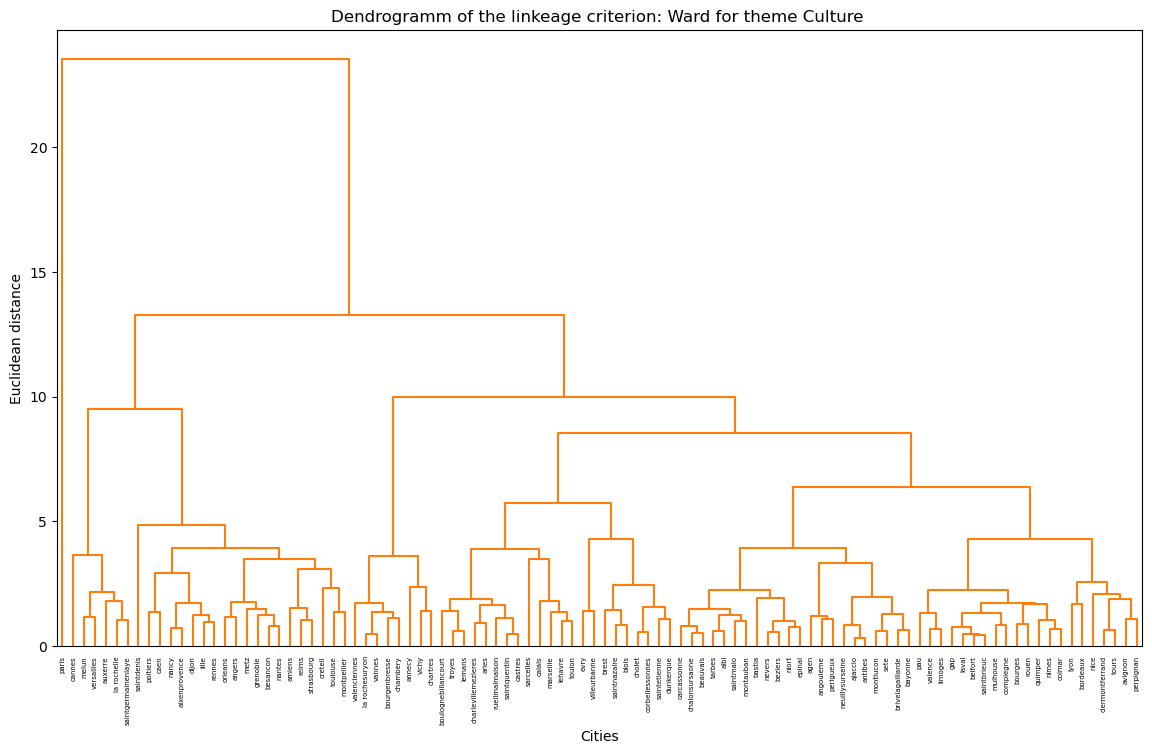

In [119]:
ward_linkeage_culture = linked_method(df_culture, "ward")
plot_dendrogram(ward_linkeage_culture, "Ward for theme Culture")


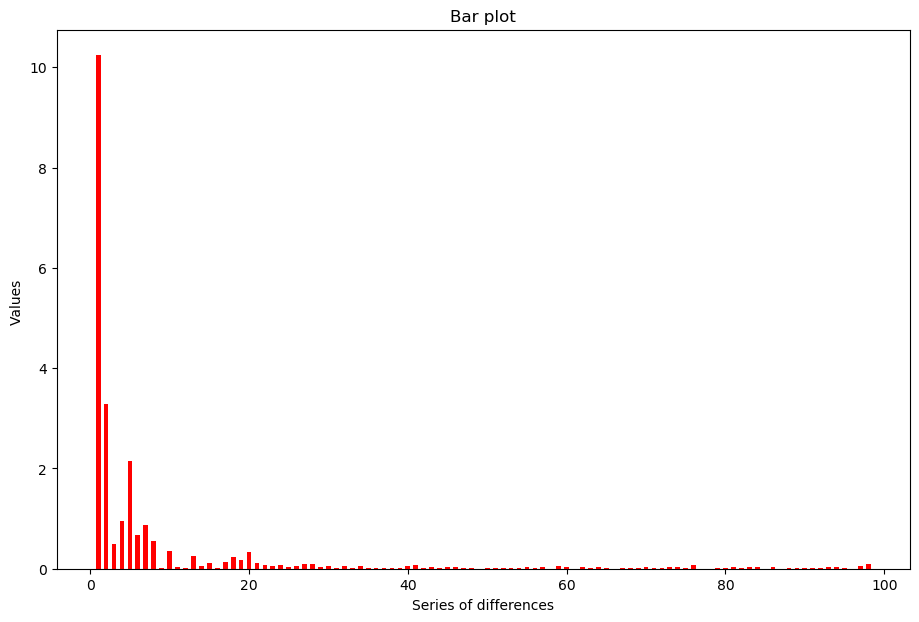

In [120]:
diff_series_culture = diff_series(ward_linkeage_culture)
plot_diff_series(diff_series_culture)


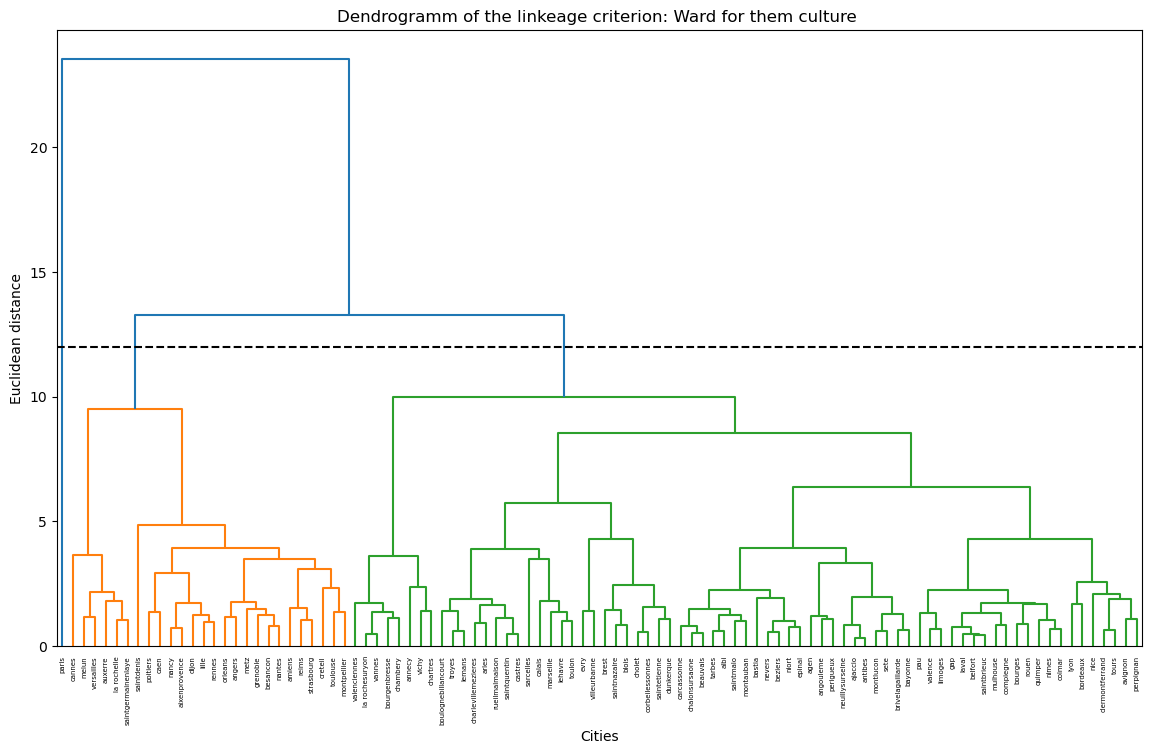

In [121]:
plot_dendrogram(ward_linkeage_culture, "Ward for them culture", threshold=12)


In [122]:
cut_culture_clusters = cut_tree(ward_linkeage_culture, n_clusters=3)


In [123]:
df_ohe_culture = one_hot_encoding(cut_culture_clusters)
df_ohe_culture

class_0  class_1  class_2
Ville                                   
agen                 1        0        0
aixenprovence        0        1        0
ajaccio              1        0        0
albi                 1        0        0
amiens               0        1        0
...                ...      ...      ...
valenciennes         1        0        0
vannes               1        0        0
versailles           0        1        0
vichy                1        0        0
villeurbanne         1        0        0

[100 rows x 3 columns]

In [124]:
df_class0_culture = filter_df_by_class(df_ohe_culture, "class_0")
df_class1_culture = filter_df_by_class(df_ohe_culture, "class_1")
df_class2_culture = filter_df_by_class(df_ohe_culture, "class_2")

In [125]:
R2_culture = Calculate_R2(df_ohe_culture, df_culture)
R2_culture

R_squared
RestaurDistingues  96.700217
Musees             88.088922
MonumHistoriques   86.193694
Etudiants          43.272899
Cinema             36.877717

In [126]:
R2_culture_total = Calculate_R2(
    df_ohe_culture, df_culture, show=df_culture.shape[0]
).mean()
R2_culture_total

R_squared    52.13761
dtype: float64

In [128]:
classes_cities_culture = {0: "mediocre_culture", 1: "Rich_culture", 2: "Paris"}
df_c_culture = create_df_with_classes(
    df_culture, cut_culture_clusters, classes_cities_culture
)
df_c_culture.head()

Musees    Cinema  MonumHistoriques  PretLivres  \
Ville                                                             
agen          -0.382704 -0.593366         -0.289896   -0.383832   
aixenprovence  0.194962  0.034233          0.972517    0.013040   
ajaccio       -0.238287 -1.449183         -0.335802   -0.043656   
albi          -0.382704 -0.650421         -0.289896   -0.043656   
amiens        -0.238287 -0.079876         -0.175131   -0.610615   

               RestaurDistingues    Presse  Etudiants             Class  
Ville                                                                    
agen                   -0.223449  2.054179  -0.424320  mediocre_culture  
aixenprovence          -0.086364 -0.014744   2.580777      Rich_culture  
ajaccio                -0.086364  1.055388  -1.025339  mediocre_culture  
albi                   -0.223449  0.508432  -0.304116  mediocre_culture  
amiens                 -0.223449 -1.251342   1.018127      Rich_culture

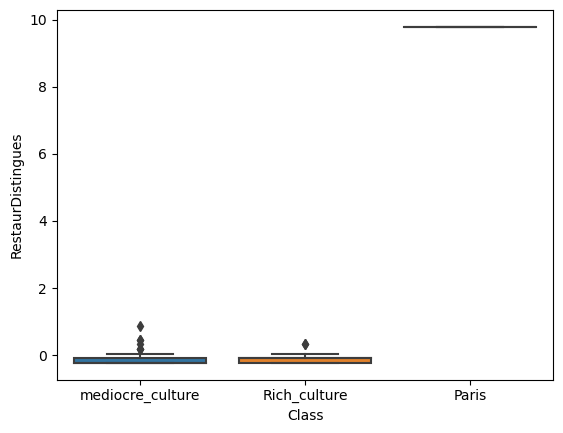

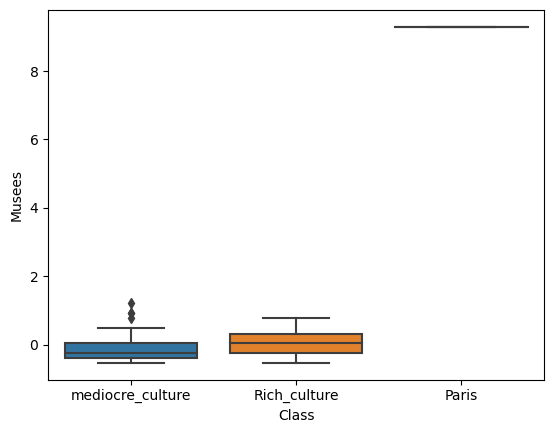

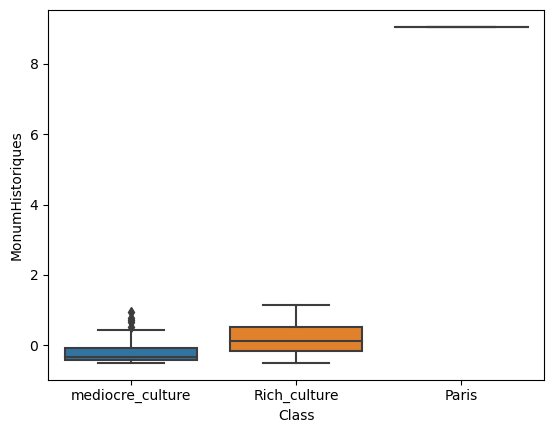

In [129]:
box_plot_class_var(df_c_culture, "RestaurDistingues")
box_plot_class_var(df_c_culture, "Musees")
box_plot_class_var(df_c_culture, "MonumHistoriques")

In [130]:
Center_of_gravity_culture = find_center_of_gravity(df_ohe_culture, df_culture)
Center_of_gravity_culture

Musees    Cinema  MonumHistoriques  PretLivres  RestaurDistingues  \
0 -0.149263 -0.368275         -0.202486    0.041776          -0.105143   
1  0.061655  1.012936          0.220366   -0.104713          -0.081091   
2  9.293206  0.547723          9.051964   -0.327136           9.783774   

     Presse  Etudiants  
0  0.087546  -0.397974  
1 -0.363223   1.101345  
2  3.052969   0.417107

In [131]:
km_culture = [
    2,
    1,
    2,
    2,
    1,
    1,
    2,
    2,
    2,
    2,
    1,
    1,
    2,
    2,
    2,
    2,
    1,
    2,
    2,
    1,
    2,
    2,
    2,
    2,
    2,
    1,
    2,
    1,
    2,
    2,
    2,
    2,
    2,
    2,
    2,
    1,
    2,
    2,
    2,
    1,
    1,
    2,
    2,
    2,
    2,
    1,
    1,
    2,
    2,
    2,
    2,
    1,
    2,
    1,
    1,
    1,
    1,
    2,
    2,
    1,
    2,
    1,
    1,
    2,
    2,
    2,
    2,
    2,
    2,
    1,
    1,
    2,
    1,
    1,
    2,
    1,
    1,
    2,
    2,
    2,
    1,
    2,
    1,
    2,
    2,
    2,
    2,
    2,
    1,
    2,
    2,
    1,
    1,
    2,
    2,
    2,
    2,
    1,
    2,
    2,
]
km_culture = np.array(km_culture)
df_km_culture = one_hot_encoding(km_culture)

In [132]:
df_class0_culture_opt = filter_df_by_class(df_km_culture, "class_1")
df_class1_culture_opt = filter_df_by_class(df_km_culture, "class_2")

In [133]:
R2_culture_opt = Calculate_R2(df_km_culture, df_culture)
R2_culture_opt

R_squared
Etudiants          44.869992
Cinema             40.963687
MonumHistoriques   12.946178
Musees              8.907925
RestaurDistingues   4.171785

In [134]:
R2_culture_opt_total = Calculate_R2(
    df_km_culture, df_culture, show=df_culture.shape[0]
).mean()
R2_culture_opt_total

R_squared    16.699862
dtype: float64

- The first class ("Agen", "Ajaccio", "Albi", "Angouleme", "Annecy", "Antibes", "Arles",
"Bastia", "Bayonne", "Beauvais", "Belfort", ..., "SaintEtienne","Troyes", "Valence",
"Valenciennes", "Vannes", "Vichy") is composed of 67 individuals before K-means.
This class can be described as cities with modest culture.

- The second class ("AixEnProvence", "Amiens", "Angers", "Auxerre", "Avignon", "Besancon",
"Bordeaux", "Caen", "Cannes", "ClermontFerrand", ..., "Montpellier", "Nancy", "Nantes",
"Orleans", "Paris", "Perpignan", "Poitiers", "Reims", "Rennes", "SaintDenis",
"SaintGermainEnLaye", "Strasbourg", "Toulouse", "Tours") is composed of 33 individuals
before K-means. This class can be described as cultural cities.

- Third class consist of Paris being a stand out because it is one of the most culturally
rich cities in the whole world.

- Despite applying the K-means algorithm, there was no big difference in optimization besides
getting paris to join the cultural cities.

- The thematic classification continues with a particular focus on the themes "economy"
and "risk," consisting of 25 and 16 variables respectively. A division into three
classes—disadvantaged, moderate, and wealthy—was carried out for the "economy" theme,
while a division into two classes—predictable and precarious—was applied to the "risk"
theme, with significant optimization.
- However, for the themes "nature" and "culture,"
although the classes were identified, no real optimization was observed after applying
the K-means algorithm. The detailed results, dendrograms, and tables provide an in-depth
analysis of the clusters of individuals before and after K-means for each theme.

# Formal Concept Analysis

- We will treat all themes as latent qualitative thematic variables with their modalities
to enrich our work, moving towards a more logical and formal classification using formal
concept analysis.
- Now, we focus on the part of partial resemblance within the thematic classification framework.
This involves the complete one hot encoding table of the four thematic variables, where
each variable has its modalities.


In [135]:
df_km_eco = df_km_eco.rename(
    columns={
        "class_1": "Low_econ_class",
        "class_2": "Middle_econ_class",
        "class_3": "Rich_econ_class",
    }
)
df_km_nature = df_km_nature.rename(
    columns={"class_1": "Inland_city", "class_2": "Coastal_city"}
)
df_km_culture = df_km_culture.rename(
    columns={"class_1": "mediocre_culture", "class_2": "Rich_culture"}
)
df_km_risk = df_km_risk.rename(columns={"class_1": "Safe", "class_2": "Risky"})

In [136]:
themes_ohe = (df_km_eco.join(df_km_culture).join(df_km_nature).join(df_km_risk)).astype(
    bool
)
themes_ohe

Low_econ_class  Middle_econ_class  Rich_econ_class  \
Ville                                                               
agen                     True              False            False   
aixenprovence            True              False            False   
ajaccio                 False               True            False   
albi                    False               True            False   
amiens                  False               True            False   
...                       ...                ...              ...   
valenciennes             True              False            False   
vannes                   True              False            False   
versailles              False              False             True   
vichy                    True              False            False   
villeurbanne             True              False            False   

               mediocre_culture  Rich_culture  Inland_city  Coastal_city  \
Ville                                                                      
agen                      False          True         True         False   
aixenprovence              True         False        False          True   
ajaccio                   False          True        False          True   
albi                      False          True         True         False   
amiens                     True         False         True         False   
...                         ...           ...          ...           ...   
valenciennes              False          True         True         False   
vannes                    False          True         True         False   
versailles                 True         False         True         False   
vichy                     False          True         True         False   
villeurbanne              False          True         True         False   

                Safe  Risky  
Ville                        
agen            True  False  
aixenprovence   True  False  
ajaccio         True  False  
albi            True  False  
amiens         False   True  
...              ...    ...  
valenciennes   False   True  
vannes          True  False  
versailles      True  False  
vichy          False   True  
villeurbanne    True  False  

[100 rows x 9 columns]

In [139]:
# Construct a FormalContext from a binarized pandas dataframe
fca_data = FormalContext.from_pandas(themes_ohe)

In [140]:
# Construct a Concept Lattice :
concept_lattice = ConceptLattice.from_context(fca_data)

In [141]:
print(f"We have {len(concept_lattice)} concept in this lattice")

We have 69 concept in this lattice


- A lattice represent a ccouple of intent and extent where each intent is a feature
and extent is an observation (city in our case here)


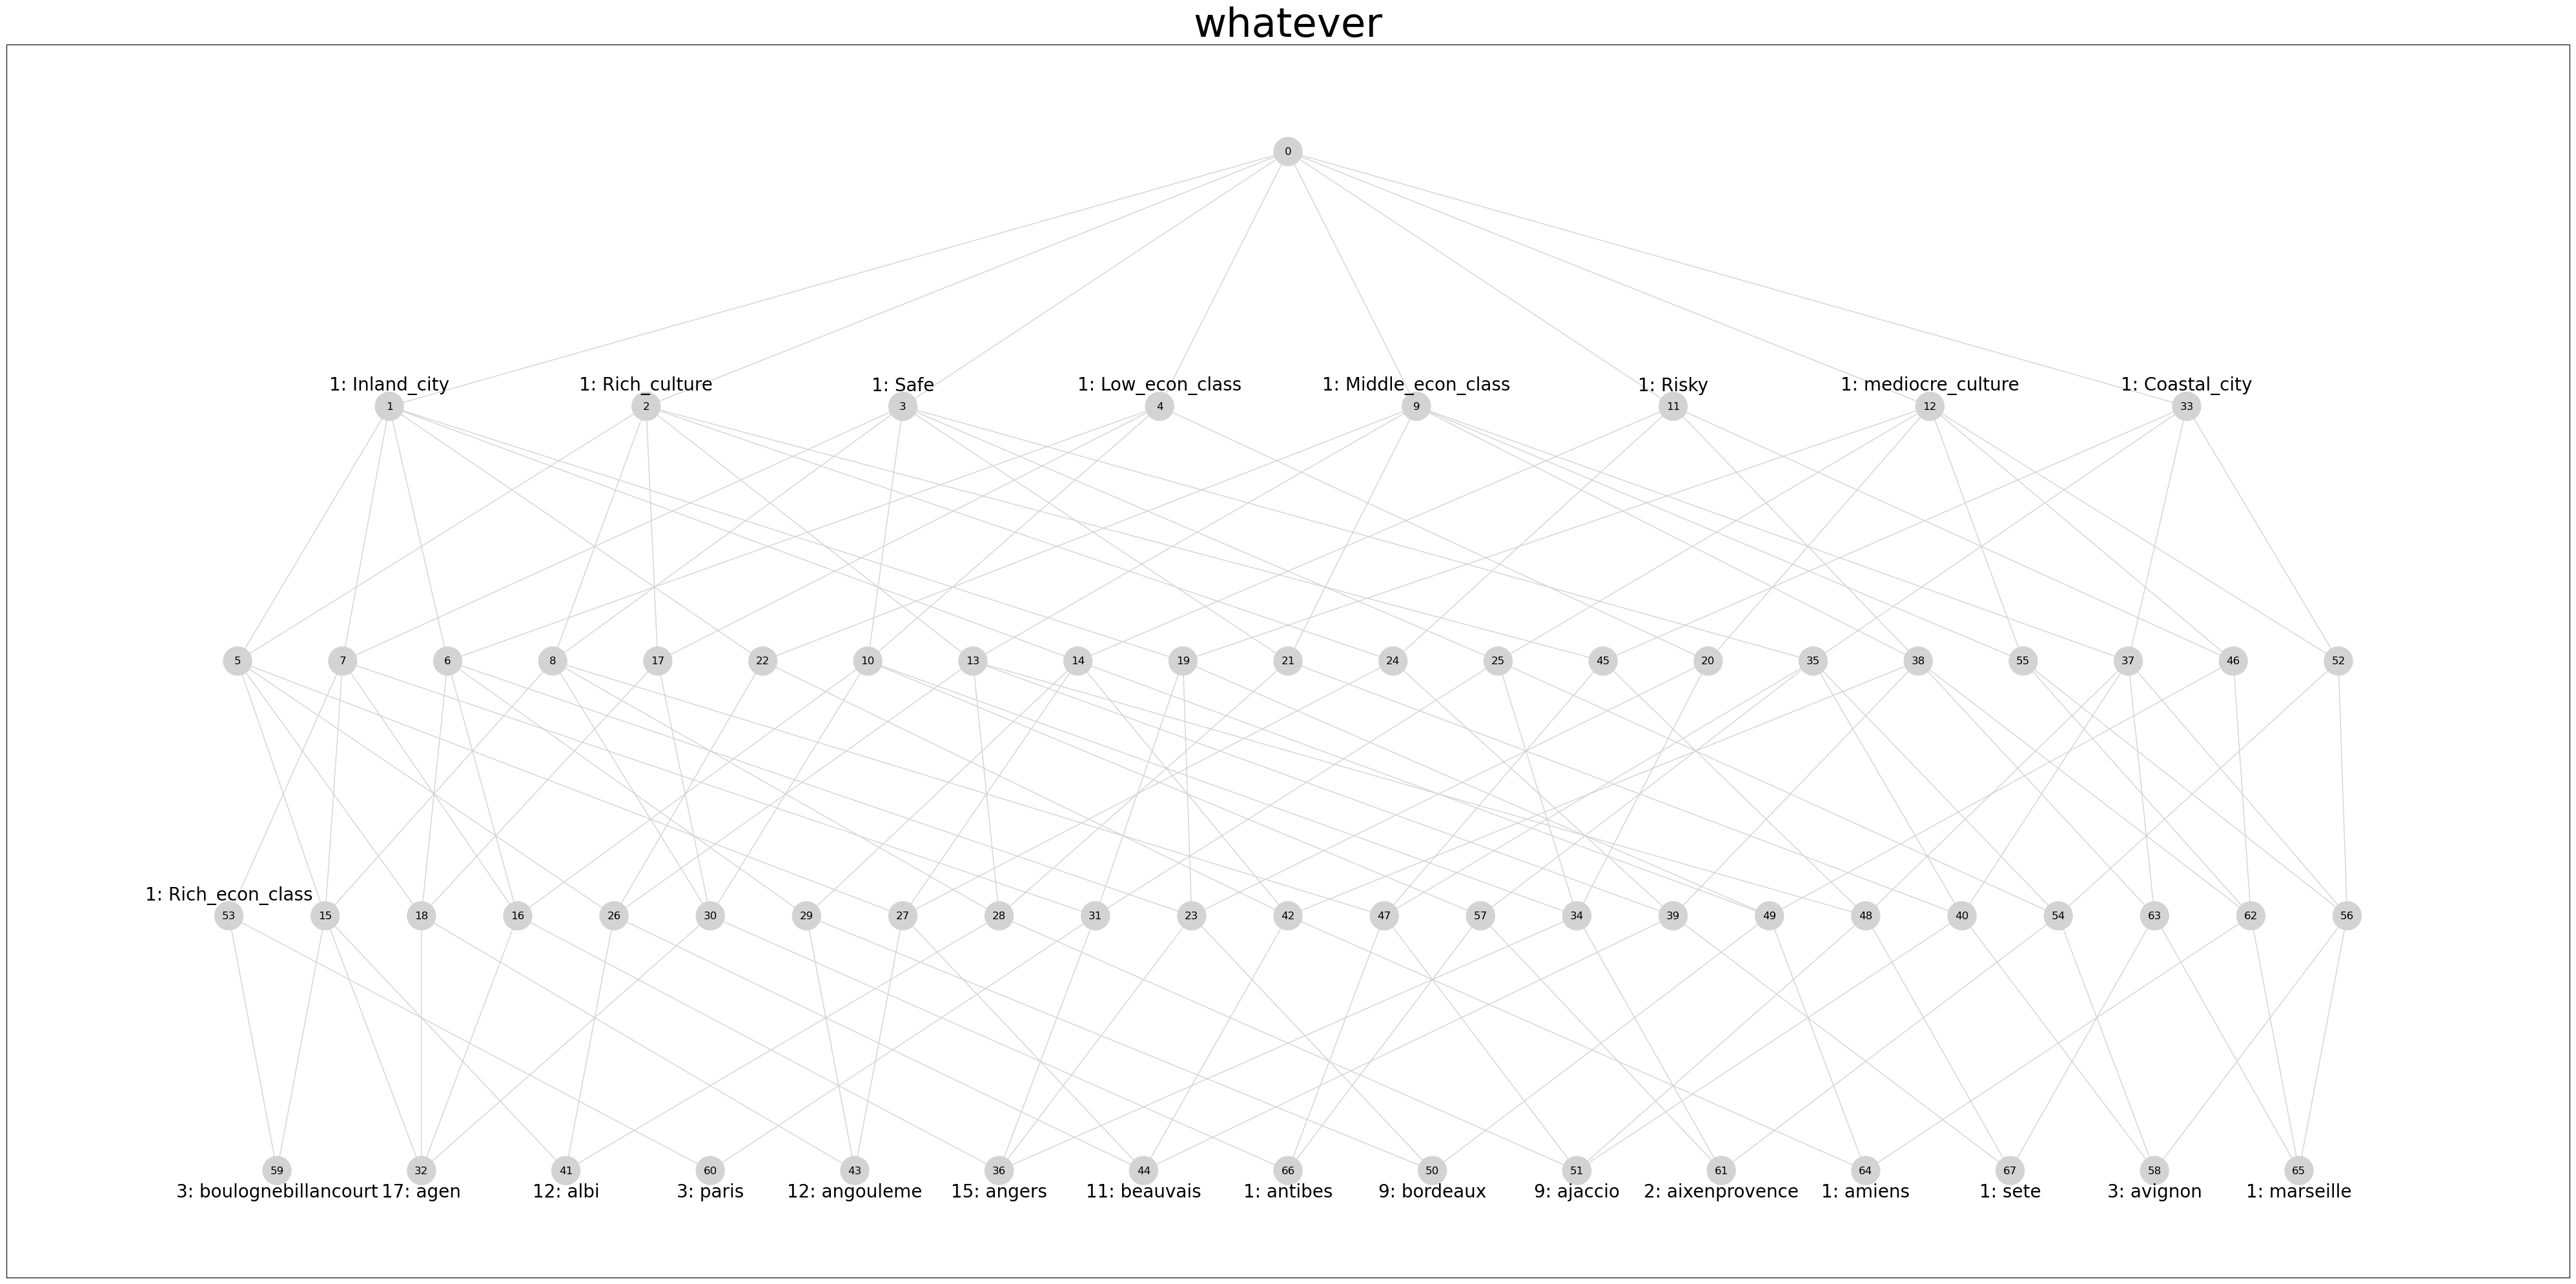

In [142]:
# We'll visualize all the nodes and try to get some good information
fig, ax = plt.subplots(figsize=(40, 20))
vsl = LineVizNx(
    node_label_font_size=20,
    node_size=1000,
    flg_axes=True,
    node_alpha=50,
    flg_drop_bottom_concept=True,
)
vsl.draw_concept_lattice(
    concept_lattice,
    ax=ax,
    flg_node_indices=True,
    max_nex_intent_count=3,
    max_new_extent_count=1,
    # Prefix shows count of features of cities
    flg_new_intent_count_prefix=True,
    # Prefix shows count of cities that have a feature
    flg_new_extent_count_prefix=True,
)
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1])
plt.title("whatever", size=45)
plt.tight_layout()
plt.show()

In [143]:
def get_intent_extent_of_node(i):
    return print(
        f"{(concept_lattice[i].extent)}: \n characterized by \n {(concept_lattice[i].intent)} "
    )

In [144]:
get_intent_extent_of_node(64)

('amiens',): 
 characterized by 
 ('Middle_econ_class', 'mediocre_culture', 'Inland_city', 'Risky') 


In [145]:
get_intent_extent_of_node(65)

('marseille',): 
 characterized by 
 ('Middle_econ_class', 'mediocre_culture', 'Coastal_city', 'Risky') 


In [146]:
get_intent_extent_of_node(60)

('paris', 'saintgermainenlaye', 'versailles'): 
 characterized by 
 ('Rich_econ_class', 'mediocre_culture', 'Inland_city', 'Safe') 


In [147]:
get_intent_extent_of_node(18)


('agen', 'angouleme', 'annecy', 'bayonne', 'belfort', 'blois', 'bourgenbresse', 'chambery', 'chartres', 'colmar', 'compiegne', 'corbeilessonnes', 'epinal', 'evry', 'laval', 'limoges', 'mulhouse', 'nevers', 'orleans', 'perigueux', 'rouen', 'saintbrieuc', 'sarcelles', 'tarbes', 'troyes', 'valenciennes', 'vannes', 'vichy', 'villeurbanne'): 
 characterized by 
 ('Low_econ_class', 'Rich_culture', 'Inland_city') 


We can also get the child and ancestors of each node thus we can get more
information about partial resemblance between cities

In [148]:
concept_lattice.descendants(15)


frozenset({32, 41, 59, 68})

In [149]:
concept_lattice.ancestors(15)


frozenset({0, 1, 2, 3, 5, 7, 8})

In [150]:
concept_lattice.children(15)


frozenset({32, 41, 59})

In [151]:
concept_lattice.parents(15)


frozenset({5, 7, 8})

# Conclusion

- In conclusion, this study provided an in-depth analysis of the data through the classification
of individuals and variables. The classification of individuals revealed significant clusters,
highlighting global and partial similarities and differences among them throughout different
dimensions and spaces.